# **Daegu Apartment**

Suryo Apendi

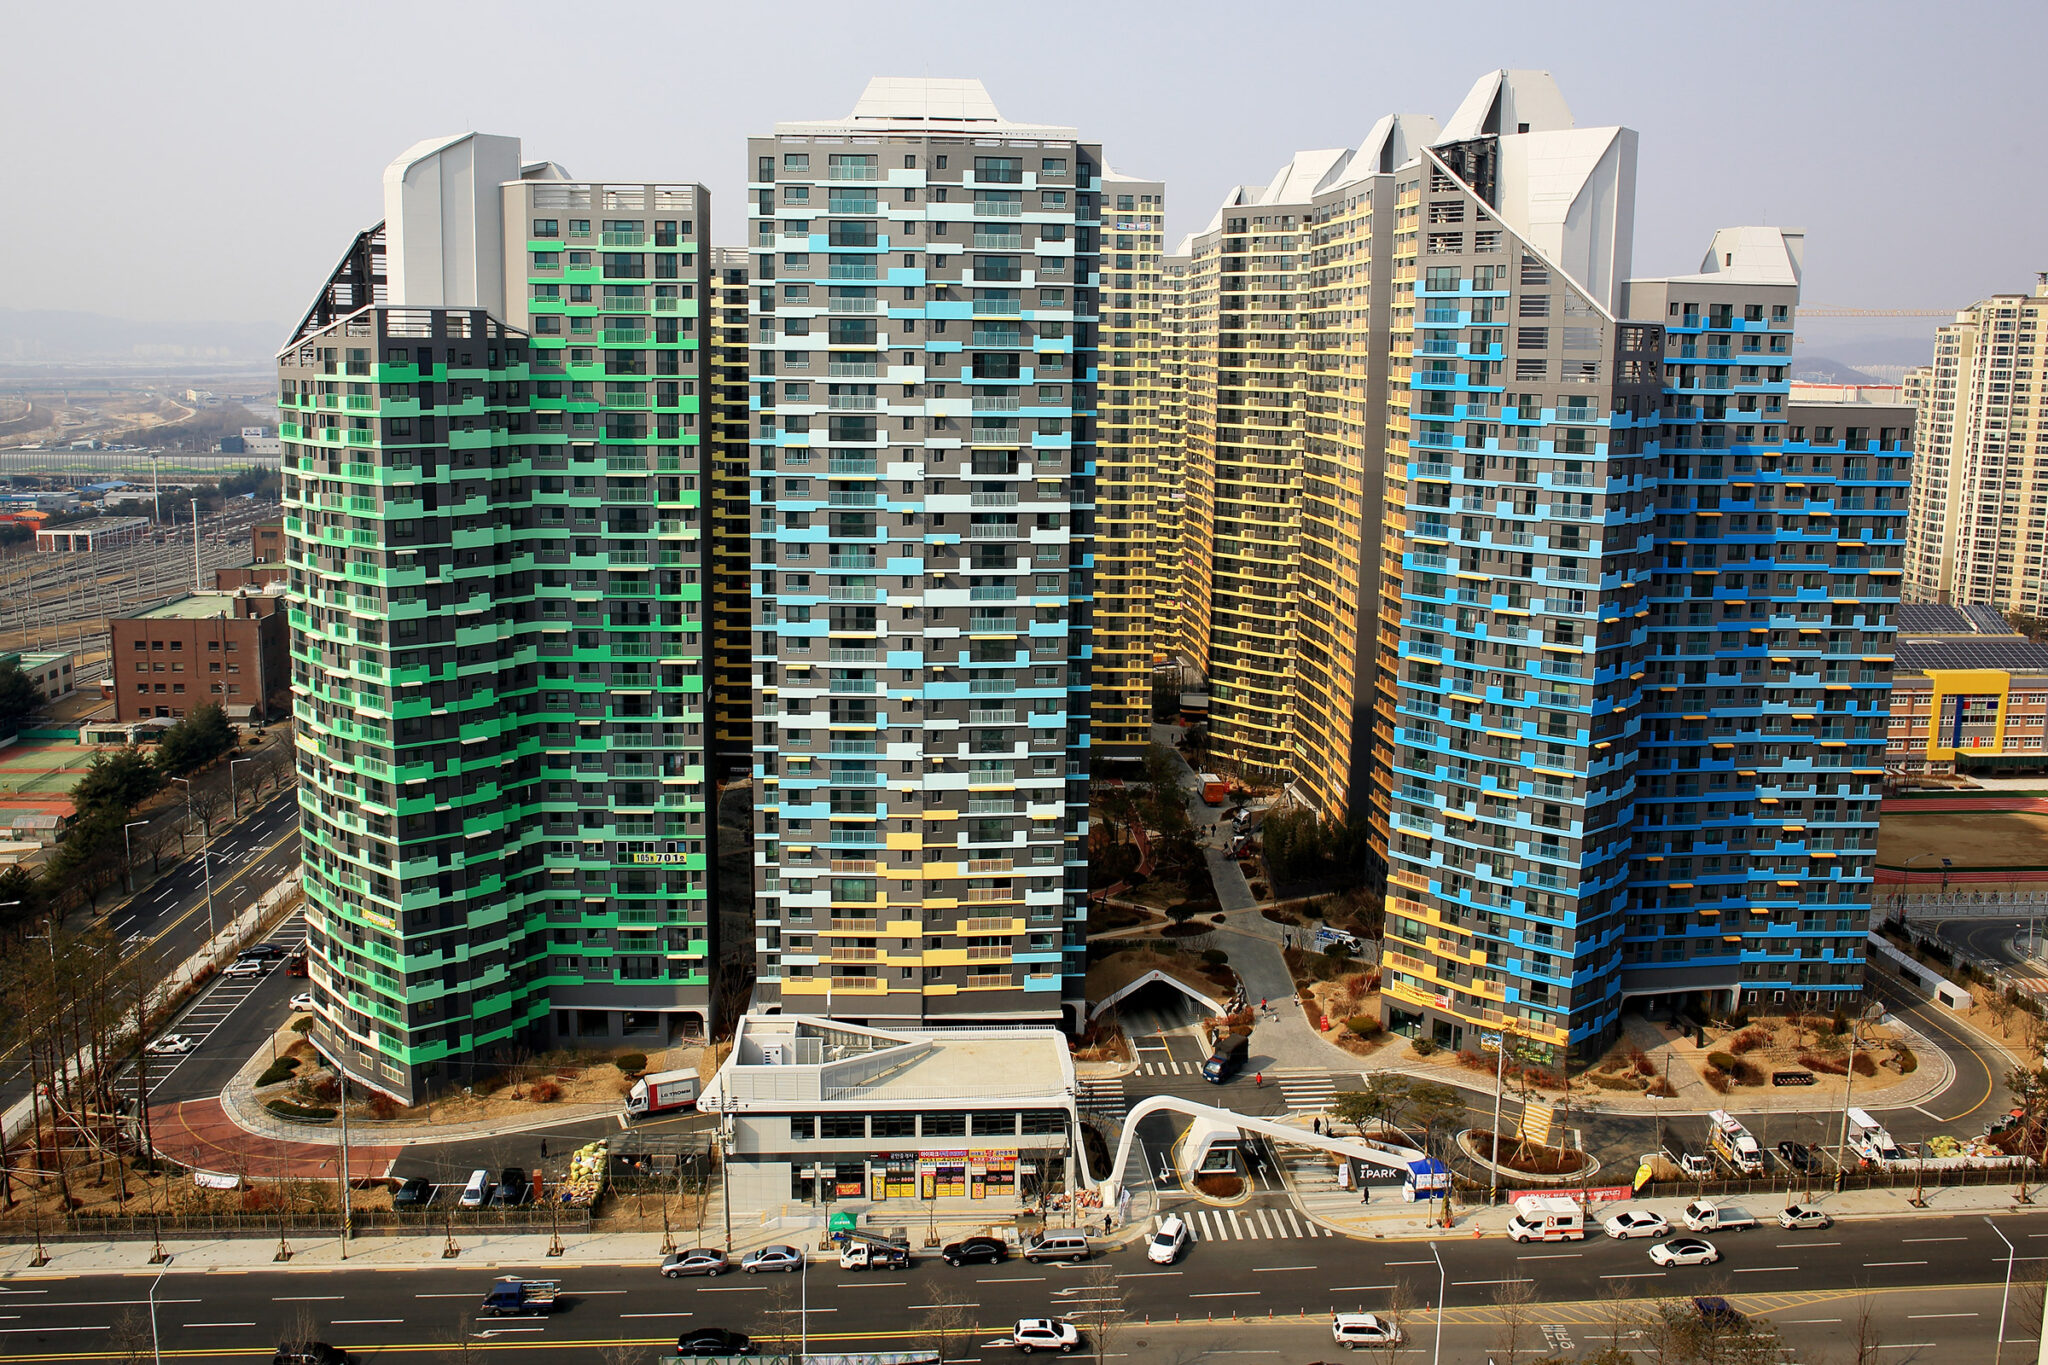

source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.baljon.nl%2Fhome%2Fprojecten%2Fipark-daegu-bl1%2F&psig=AOvVaw2lDuG2Zp3AH1rxjzDtJQoz&ust=1706668623688000&source=images&cd=vfe&opi=89978449&ved=2ahUKEwiroeSZioSEAxV7TmwGHdCOCOAQjRx6BAgAEBc

Daftar isi

1. Import Library
2. Data n Business Understanding
3. Define X and y
4. Modeling
5. VIF
6. Spliting
7. Bench mark model
8. Hyperparameter Tuning
9. Conclution & Recomendation

# 1. Import Library

In [1397]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score,cross_validate


# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# metric- setelah di predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge, Lasso

In [1398]:
from xgboost.sklearn import XGBRegressor

# 2. Data and Business Understanding

## Conteks
Apartemen merupakan salah satu jawaban atas kebutuhan perumahan masyarakat modern akibat lahan perumahan yang terbatas dan aktivitas bisnis yang padat di kawasan perkotaan. Oleh karena itu, akan sangat menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal.

Individu atau perusahaan biasanya membuat penawaran apartemen (unit). Penawar dapat menjual unitnya di platform dengan menentukan harga apartemen mereka. Cara tersebut cukup sulit bagi pemilik apartemen untuk menyesuaikan dengan harga pasar. Jika harganya terlalu tinggi dibandingkan dengan harga pasar, akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, pemilik akan kesulitan mendapatkan keuntungan maksimal.

## Problem Statement

Sebagai wilayah yang padat penduduk, kebutuhan apartment sangatlah tinggi di Daegu, namun beberapa owner yang ingin menyewakan apartment memiliki kendala dalam menentukan harga.

Ada yang terlalu tinggi sehingga unitnya tidak laku" dan menyebabkan unit kosong lama, dan dalam jangka panjang bisa memberikan domino effefct "penurunan nilai properti"

Ada juga yang terlalu rendah, sehingga profitnya sangat kecil.

Oleh sebab itu perusahan agen properti Rent2u, ingin menghadirkan solusi untuk masalah tersebut dengan membrikan info kepada agen properti dan owner, agar dapat menentukan harga sewa apartment yang kompetitif, yang menjadikan katalis ekonomi dan target sales terpenuhi

 **Oleh sebab itu mengetahui dan memprediksi harga jual apartment sangat penting untuk Agen properti dan Owner apartment, untuk menentukan harga jual yang kompetitif**.

## Goals

Untuk mengatasi masalah diatas, Rent2u sebagai perusahaan pemasaran, ingin memprediksi harga apartment dengan machine learning, sehingga agency bisa menentukan harga yang kompetitif.

## Aproach

Untuk menentukan harga apartment yang kompetitif di kota Daegu. Saya akan menggunakan machine learning dengan menggunakan semua fitur yang ada.
Dengan membuat sebuah model regresi yang akan membantu dalam menentukan harga apartment

## Pemahaman Feature

| Column                          |  Description                            |
|---------------------------------|-----------------------------------------|
| Hallway Type                    | Tipe Apartment                          |
| TimeToSubway                    | Waktu tempuh ke subway station terdekat |
| SubwayStation                   | Nama subway station terdekat            |
| N_FacilitiesNearBy(ETC)         | Jumlah fasilitas di sekitar             |
| N_FacilitiesNearBy(PublicOffice)| Jumlah fasilitas umum terdekat          |
| N_SchoolNearBy(University)      | Jumlah universitas terdekat             |
| N_Parkinglot(Basement)          | Jumlah parking lot                      |
| YearBuilt                       | Tahun apartment dibangun                |
| N_FacilitiesInApt               | Jumlah fasilitas di Apartment           |
| Size(sqft)                      | Ukuran apartment(in square feet)        |
| SalePrice                       | Harga apartment  (Won)                  |

# Data Understanding

In [1399]:
df=pd.read_csv('data_daegu_apartment.csv')
df.head()

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                               1.0                         2.0   

   N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  SalePrice  
0                  1270.0       2007                 10       1387     346017  
1                     0.0       1986                  4        914     150442  
2                    56.0       1997                  5        558      61946  
3                   798.0       2005                  7        914     165486  
4                   536.0       2006                  5       1743     311504

In [1400]:
df.shape

(4123, 11)

In [1401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [1402]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

Columns  Unique Count  \
0                        HallwayType             3   
1                       TimeToSubway             5   
2                      SubwayStation             8   
3            N_FacilitiesNearBy(ETC)             4   
4   N_FacilitiesNearBy(PublicOffice)             8   
5         N_SchoolNearBy(University)             6   
6             N_Parkinglot(Basement)            20   
7                          YearBuilt            16   
8                  N_FacilitiesInApt             9   
9                          Size(sqf)            89   
10                         SalePrice           838   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [terraced, mixed, corridor]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]  
3                                                                                                                                                                                           

In [1403]:
df.duplicated().sum()

1422

In [1404]:
df.drop_duplicates(inplace=True)

In [1405]:
df.shape

(2701, 11)

In [1406]:
# Filter only numerical columns
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

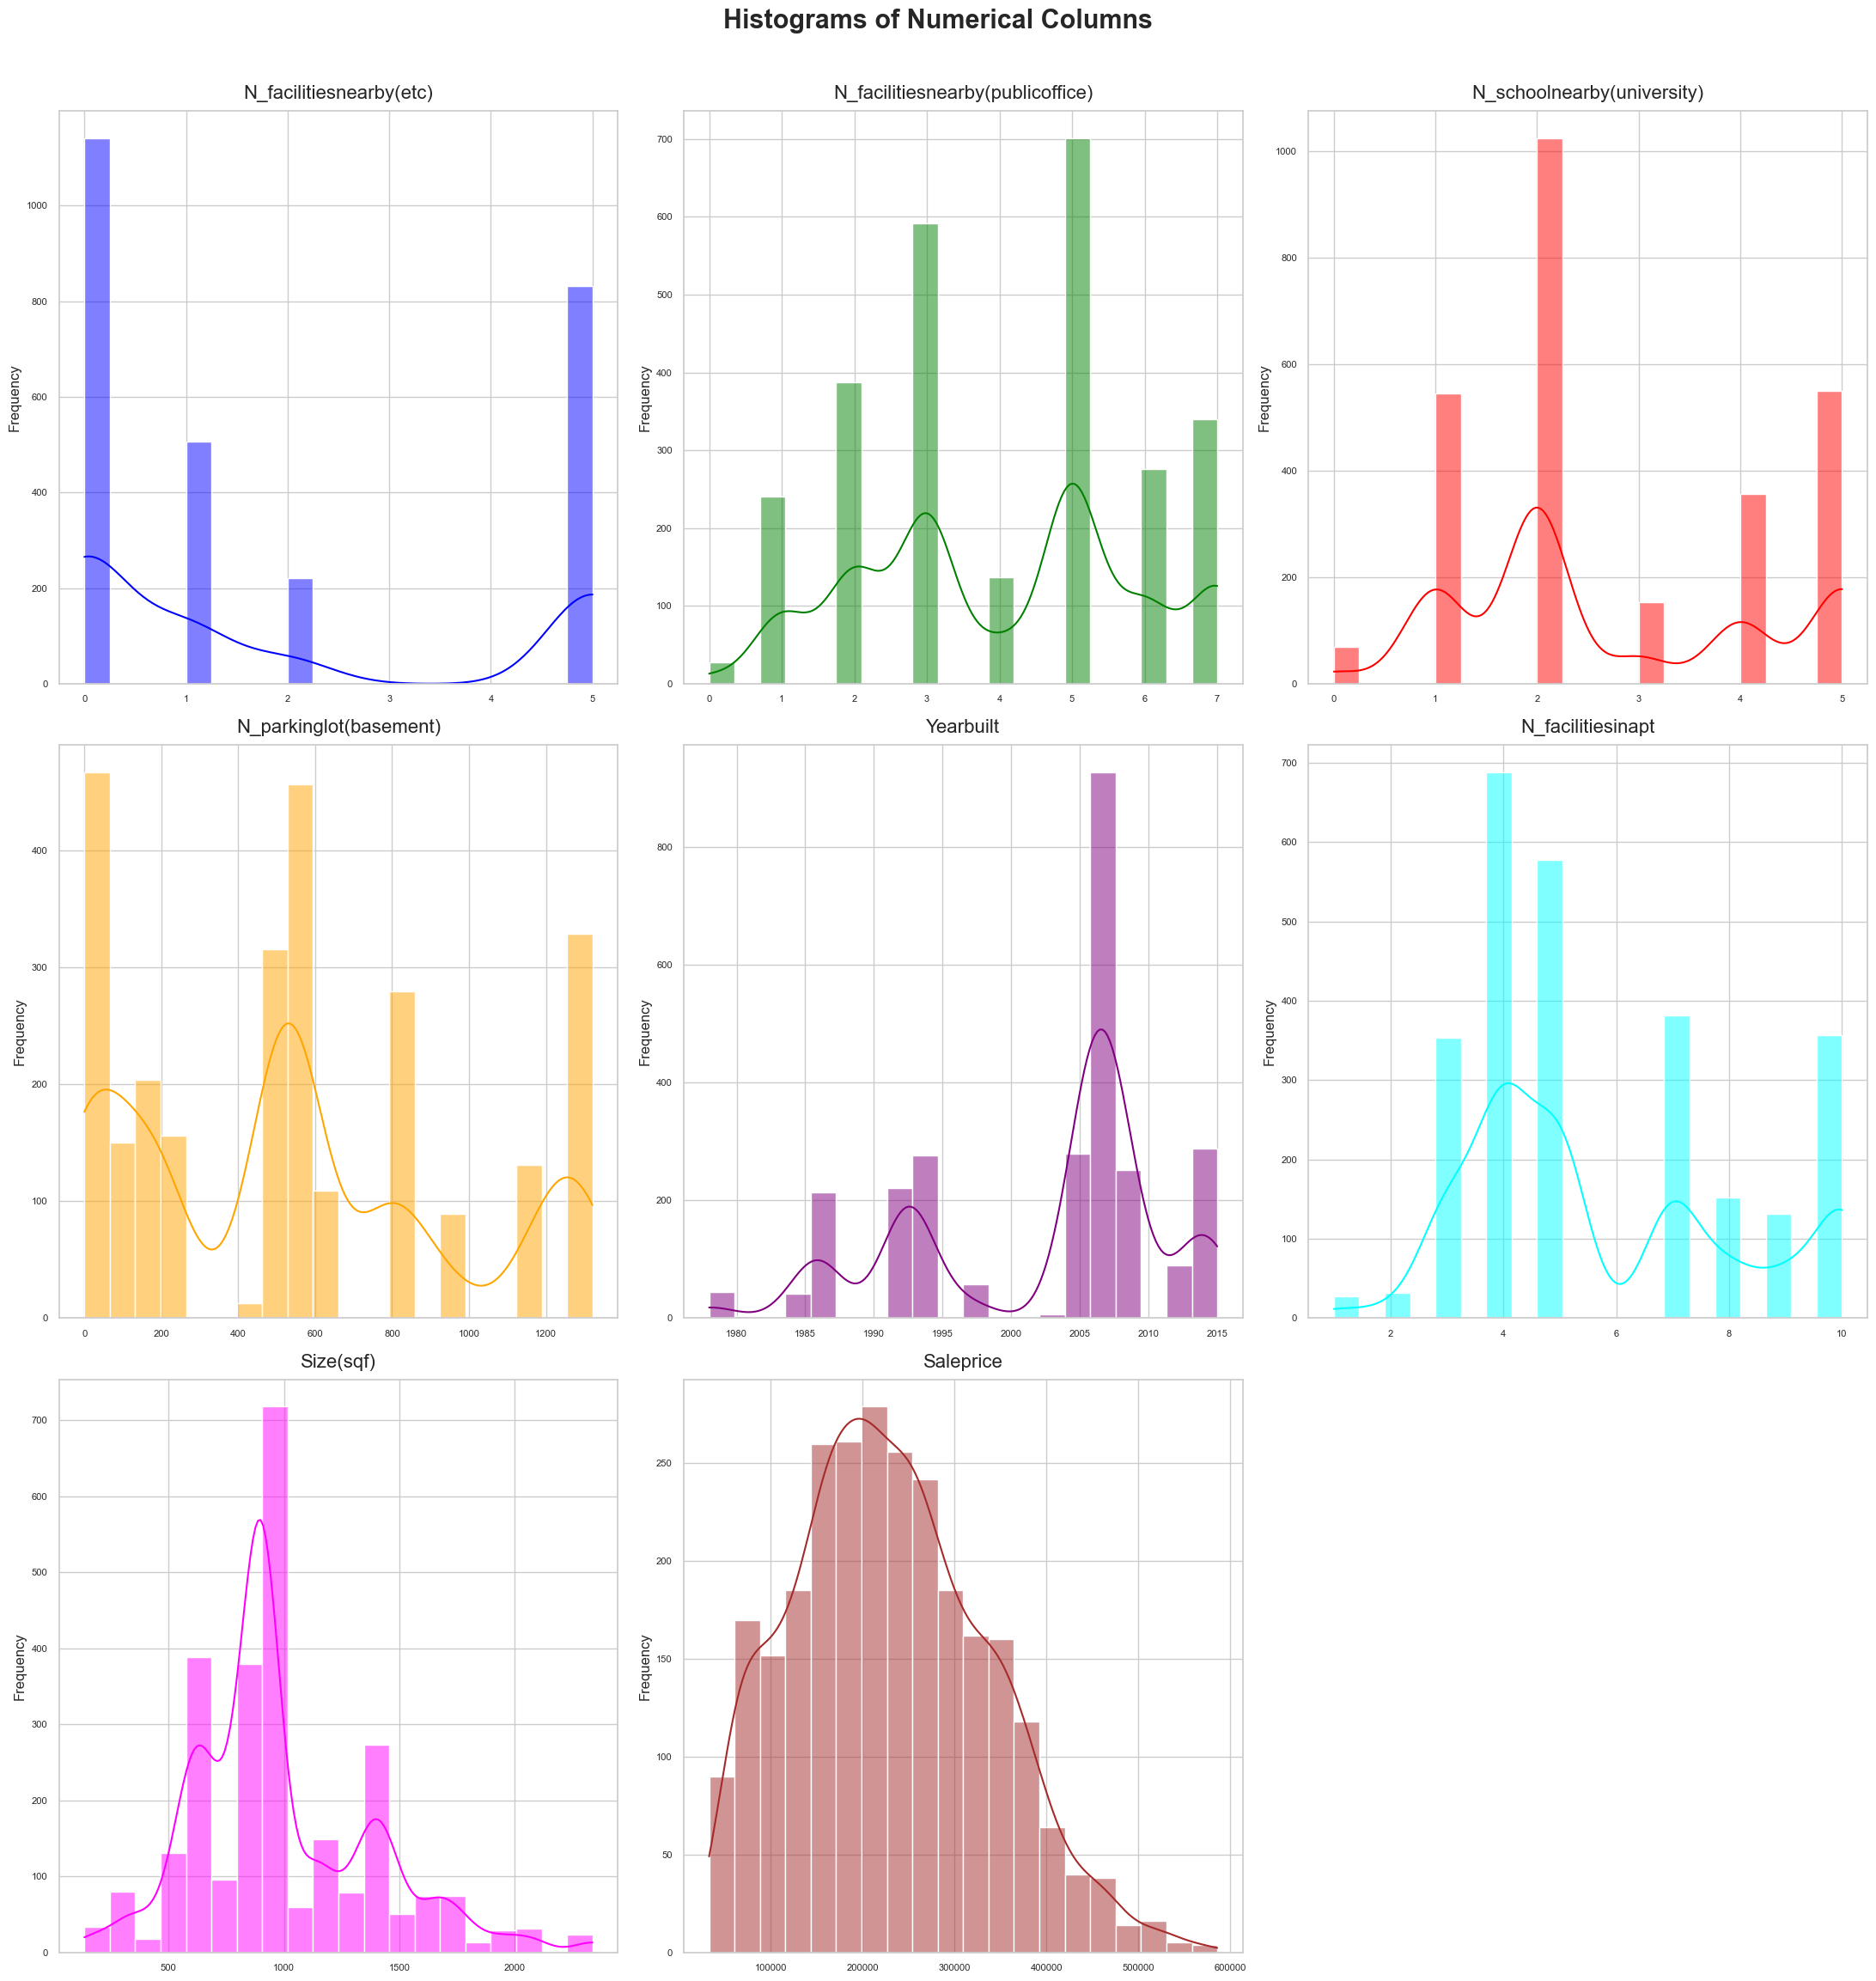

In [1407]:
# Calculate the number of rows and columns needed for the plots
n_plots = len(numerical_col)
n_rows = int(np.ceil(n_plots / 3))  # Assuming 4 plots per row

# Create the subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(22, 8 * n_rows))
axes = axes.flatten()

# Define a list of colors for the histograms
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown']

# Plot histograms for each numeric column with different colors
for i, column in enumerate(numerical_col):
    color_index = i % len(colors)  # Cycle through colors if more plots than available colors
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=16, pad=10)  # Title with increased fontsize and padding
    axes[i].set_xlabel('')  # Remove x-label for better readability
    axes[i].set_ylabel('Frequency')  # Set y-label as 'Frequency'
    axes[i].tick_params(axis='both', labelsize=8)  # Set smaller tick label font size

# Remove unused subplots if the number of plots is odd
for j in range(n_plots, n_rows * 3):
    fig.delaxes(axes[j])


plt.suptitle('Histograms of Numerical Columns', fontsize=22, fontweight='bold')

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [1408]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

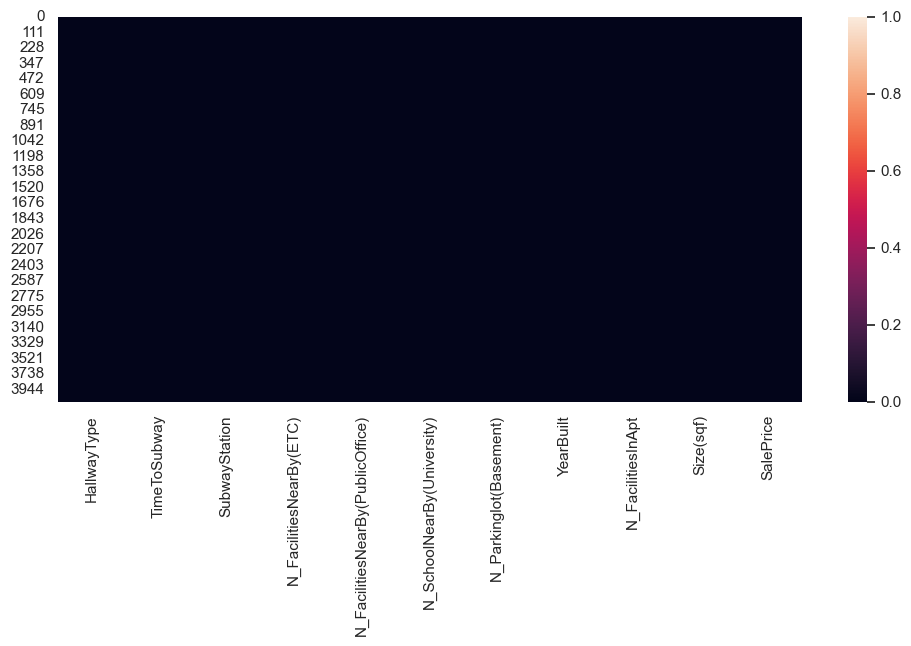

In [1409]:
plt.figure(figsize = (12, 5))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1)
plt.show()

Tidak ada missing value saat dicek pada data set

Terdapat 1422 baris data yang duplikat, data tersebut akan dihapus akan machine learning lebih optimal dan akurat

### Cek korelasi

N_FacilitiesNearBy(ETC)  \
N_FacilitiesNearBy(ETC)                          1.000000   
N_FacilitiesNearBy(PublicOffice)                 0.719104   
N_SchoolNearBy(University)                       0.603146   
N_Parkinglot(Basement)                          -0.131327   
YearBuilt                                       -0.453372   
N_FacilitiesInApt                               -0.279411   
Size(sqf)                                       -0.366269   
SalePrice                                       -0.490961   

                                  N_FacilitiesNearBy(PublicOffice)  \
N_FacilitiesNearBy(ETC)                                   0.719104   
N_FacilitiesNearBy(PublicOffice)                          1.000000   
N_SchoolNearBy(University)                                0.672793   
N_Parkinglot(Basement)                                   -0.096519   
YearBuilt                                                -0.449821   
N_FacilitiesInApt                                        -0.251487   
Size(sqf)                                                -0.327316   
SalePrice                                                -0.431966   

                                  N_SchoolNearBy(University)  \
N_FacilitiesNearBy(ETC)                             0.603146   
N_FacilitiesNearBy(PublicOffice)                    0.672793   
N_SchoolNearBy(University)                          1.000000   
N_Parkinglot(Basement)                              0.201199   
YearBuilt                                          -0.235834   
N_FacilitiesInApt                                  -0.055866   
Size(sqf)                                          -0.284113   
SalePrice                                          -0.295317   

                                  N_Parkinglot(Basement)  YearBuilt  \
N_FacilitiesNearBy(ETC)                        -0.131327  -0.453372   
N_FacilitiesNearBy(PublicOffice)               -0.096519  -0.449821   
N_SchoolNearBy(University)                      0.201199  -0.235834   
N_Parkinglot(Basement)                          1.000000   0.539013   
YearBuilt                                       0.539013   1.000000   
N_FacilitiesInApt                               0.769669   0.634979   
Size(sqf)                                       0.209004   0.114345   
SalePrice                                       0.528620   0.561748   

                                  N_FacilitiesInApt  Size(sqf)  SalePrice  
N_FacilitiesNearBy(ETC)                   -0.279411  -0.366269  -0.490961  
N_FacilitiesNearBy(PublicOffice)          -0.251487  -0.327316  -0.431966  
N_SchoolNearBy(University)                -0.055866  -0.284113  -0.295317  
N_Parkinglot(Basement)                     0.769669   0.209004   0.528620  
YearBuilt                                  0.634979   0.114345   0.561748  
N_FacilitiesInApt                          1.000000   0.187586   0.587748  
Size(sqf)                                  0.187586   1.000000   0.654347  
SalePrice                                  0.587748   0.654347   1.000000

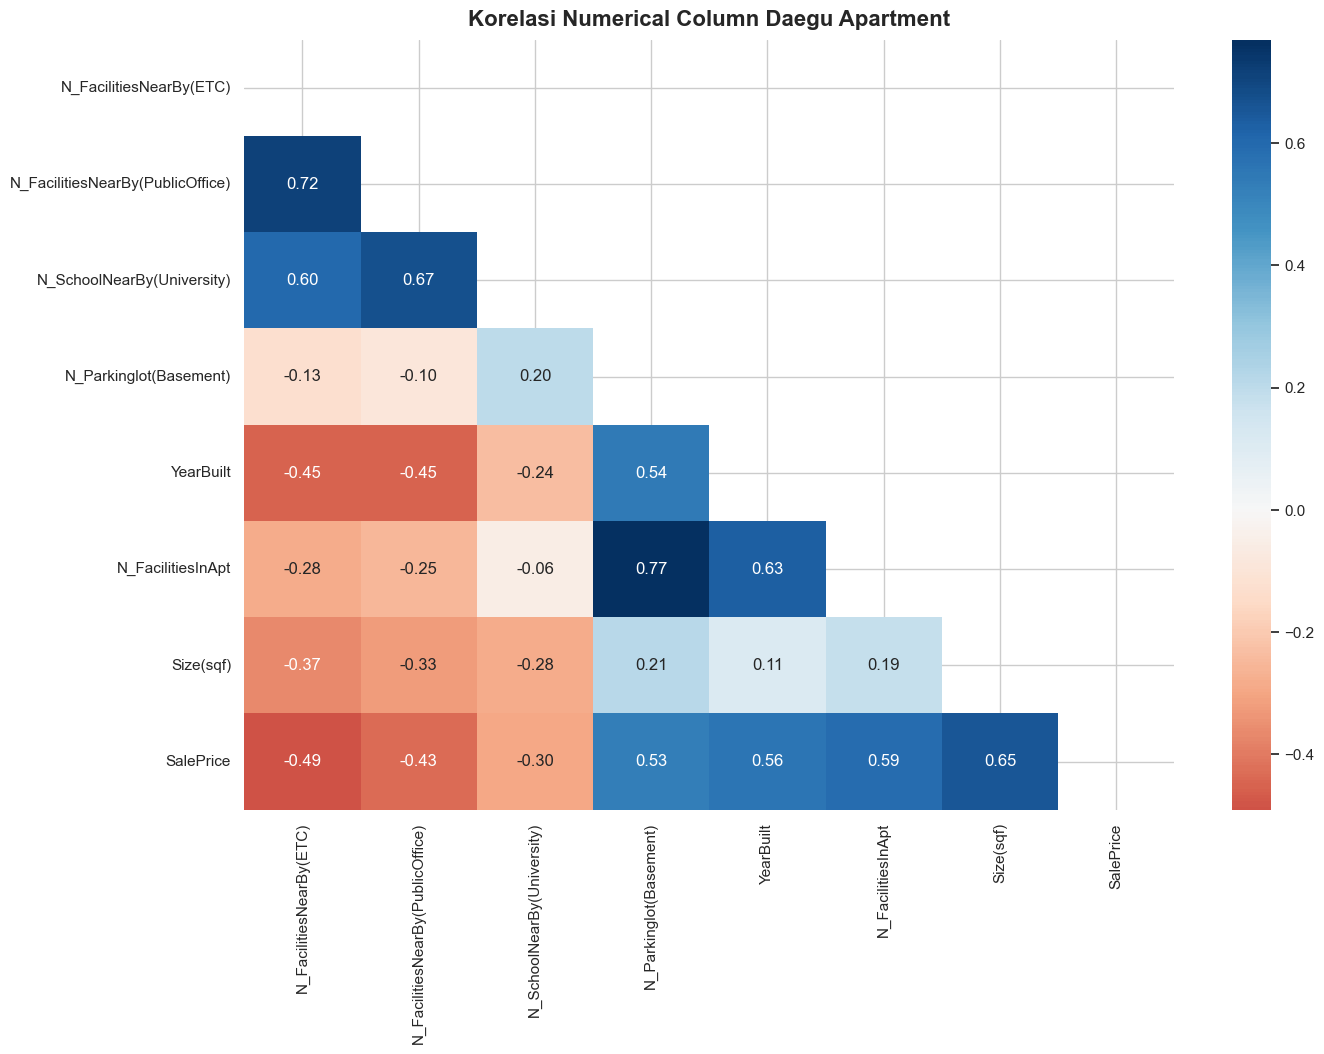

In [1410]:
correlation = df[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

plt.figure(figsize = (15, 10))
sns.heatmap(
    data = correlation,
    annot = True,
    fmt = ".2f",
    cmap = "RdBu",
    center = 0,
    mask = matriks
)

plt.title("Korelasi Numerical Column Daegu Apartment", size=16, pad=10, fontweight='bold')
plt.show()

### Cek outliers

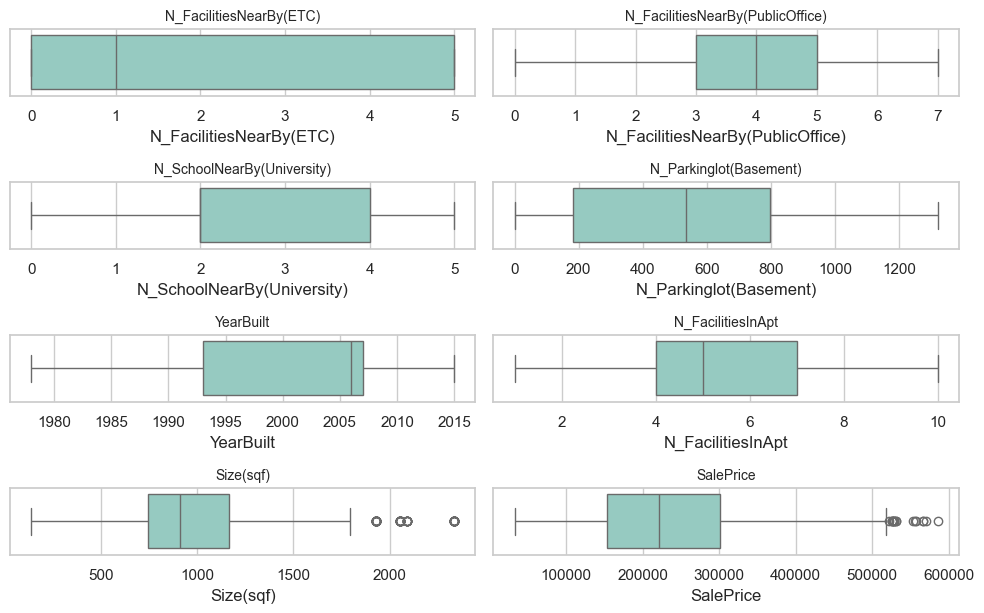

In [1411]:

plt.figure(figsize=(10,15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in numerical_col:
    ax = plt.subplot(10,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=10)
    plt.tight_layout()
    plotnumber = plotnumber + 1

Terdapat outliers pada Size(sqf) dan SalePrice, oleh sebab itu perlu di cek value dr ooutliernya dengan IQR

## **IQR (Interquartile Range)**

- Untuk menentukan data mana yang termasuk outliers.
- Outlier bawah = Q1 - 1.5 IQR or outlier atas= Q3 + 1.5 IQR

In [1412]:
# Menyimpan data outliers
outliers_data = {}

# List of numerical columns
numerical_columns = ['Size(sqf)', 'SalePrice']

for column in numerical_columns:
    
    # Hitung Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cekoutliers
    outlier_formula = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outlier_formula]

    # Store information in the dictionary
    outliers_data[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outlier_formula.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }


# summary outliers

outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                        'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_data.items()}

# Buat DF
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Memisah upper dan lower bound
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)

# Dropping kolom bound
outliers_summary_df.drop('bounds', axis=1, inplace=True)

outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Menampilkan outliers data frame
df_outliers = outliers_summary_df.style.format('{:.0f}')
df_outliers



<Axes: xlabel='Size(sqf)'>

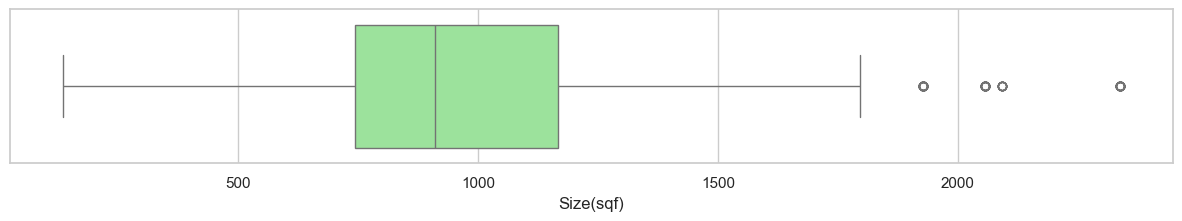

In [1413]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df["Size(sqf)"],color= 'lightgreen')

In [1414]:
df.drop(df[df['Size(sqf)'] >= 1803].index, inplace=True)

Outlier yang terlalu jauh dihapus, karena linier regression akan menggunakan RMSE dan RMSE sensitive terhadap outlier

In [1415]:
# df.sort_values(by='Size(sqf)',ascending=False).head(30)

<Axes: xlabel='SalePrice'>

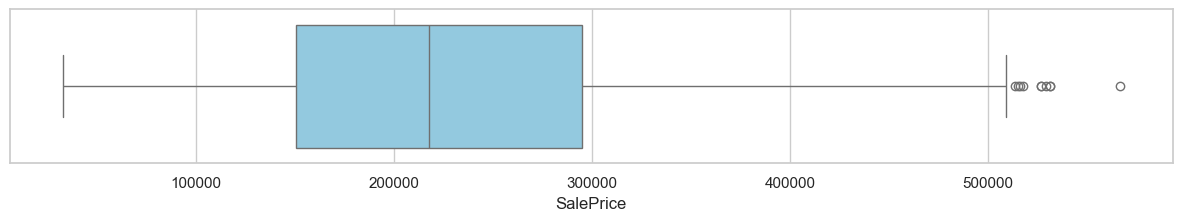

In [1416]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df["SalePrice"],color= 'skyblue')

Menghapus outlier diatas Q3 (521902), agar hasil ML lebih optimal. karena harga outlier diasumsikan org memeberikan harga yang overprice

In [1417]:
df.sort_values(by='SalePrice',ascending=False).head(10)

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
204     terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
2100    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1180    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
3966    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1295    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1998    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
2015    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1877    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
3502    terraced       0-5min              Myung-duk                      5.0   
3939    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
204                                3.0                         2.0   
2100                               3.0                         2.0   
1180                               3.0                         2.0   
3966                               3.0                         2.0   
1295                               3.0                         2.0   
1998                               3.0                         2.0   
2015                               3.0                         2.0   
1877                               3.0                         2.0   
3502                               7.0                         5.0   
3939                               3.0                         2.0   

      N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  \
204                   1270.0       2007                 10       1643   
2100                  1270.0       2007                 10       1519   
1180                  1270.0       2007                 10       1643   
3966                  1270.0       2007                 10       1643   
1295                  1270.0       2007                 10       1519   
1998                  1270.0       2007                 10       1643   
2015                  1270.0       2007                 10       1643   
1877                  1270.0       2007                 10       1643   
3502                  1174.0       2014                  9       1085   
3939                  1270.0       2007                 10       1643   

      SalePrice  
204      566371  
2100     530973  
1180     530973  
3966     529203  
1295     526548  
1998     526548  
2015     517699  
1877     515929  
3502     515044  
3939     513274

In [1418]:
df.drop(df[df['SalePrice'] >= 521902].index, inplace=True)

## Data Understanding from Hallway Type

In [1419]:
df['HallwayType'].value_counts()

HallwayType
terraced    1601
mixed        674
corridor     336
Name: count, dtype: int64

HallwayType  corridor  mixed  terraced
HallwayType       336    674      1601

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_57199/3996987337.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['HallwayType'], palette='crest')


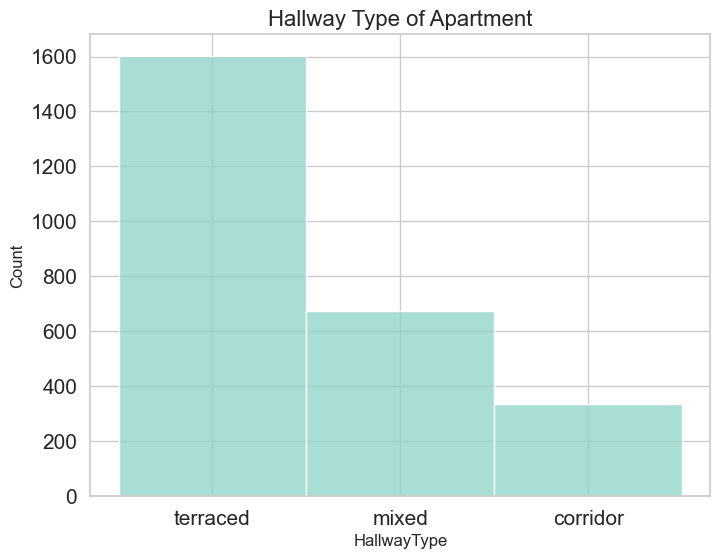

In [1420]:
# Cek relationship Sale_Price untuk tiap Hallway type
dfCount_Saleprice = df.groupby('HallwayType').agg({'HallwayType':'count'})
display(dfCount_Saleprice.T)

plt.figure(figsize=(8,6))
sns.histplot(df['HallwayType'], palette='crest')
plt.title('Hallway Type of Apartment', size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 

plt.show()

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_57199/204244618.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='HallwayType', y='SalePrice', data=df,ci=0)


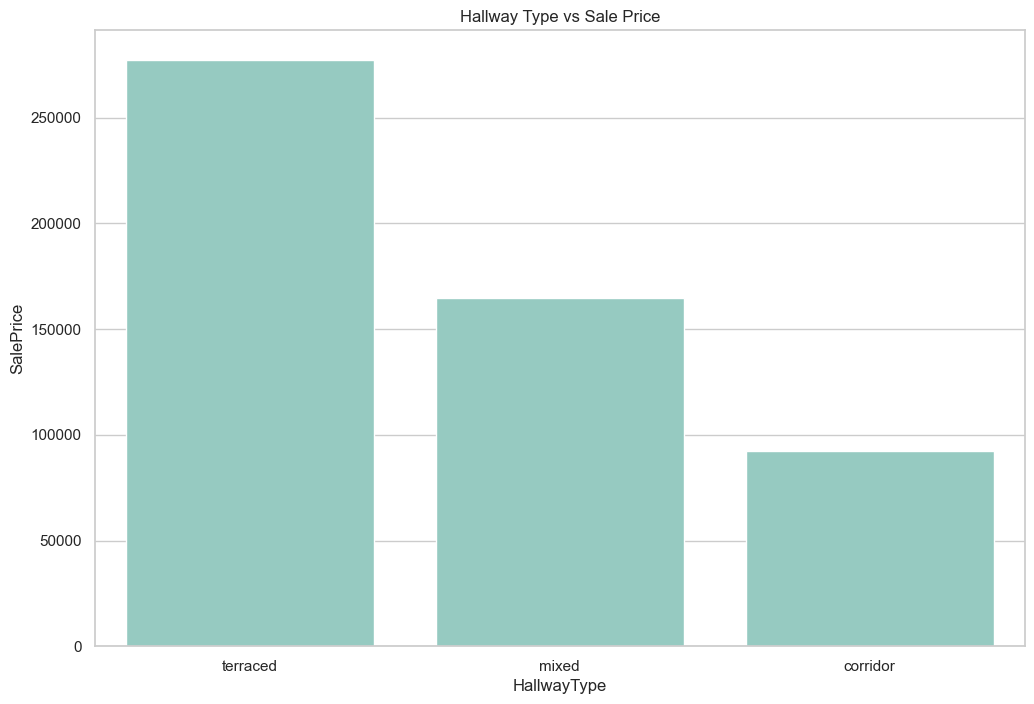

In [1421]:
plt.figure(figsize=(12, 8))
sns.barplot(x='HallwayType', y='SalePrice', data=df,ci=0)
plt.title('Hallway Type vs Sale Price')
plt.show()

Tipe Hallway paling banyak adalah Teracced dan paling sedikit corridor, model terraced memiliki rata" harga sewa tertinggi hingga -+250k won, dan corridor sekitar 98k won

In [1422]:
df.shape

(2611, 11)

In [1423]:
display(df.describe(), df.describe(include='object'))

N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
count              2611.000000                       2611.000000   
mean                  1.906549                          4.046342   
std                   2.150577                          1.884540   
min                   0.000000                          0.000000   
25%                   0.000000                          3.000000   
50%                   1.000000                          4.000000   
75%                   5.000000                          5.000000   
max                   5.000000                          7.000000   

       N_SchoolNearBy(University)  N_Parkinglot(Basement)   YearBuilt  \
count                 2611.000000             2611.000000  2611.00000   
mean                     2.679433              525.471850  2002.40023   
std                      1.507667              415.611063     9.19855   
min                      0.000000                0.000000  1978.00000   
25%                      2.000000              181.000000  1993.00000   
50%                      2.000000              536.000000  2006.00000   
75%                      4.000000              798.000000  2007.00000   
max                      5.000000             1321.000000  2015.00000   

       N_FacilitiesInApt    Size(sqf)      SalePrice  
count        2611.000000  2611.000000    2611.000000  
mean            5.683263   946.851015  224569.642283  
std             2.367327   340.673791  101157.109208  
min             1.000000   135.000000   32743.000000  
25%             4.000000   743.000000  150442.000000  
50%             5.000000   910.000000  216814.000000  
75%             7.000000  1149.000000  293805.000000  
max            10.000000  1796.000000  517699.000000

HallwayType TimeToSubway SubwayStation
count         2611         2611          2611
unique           3            5             8
top       terraced       0-5min     Myung-duk
freq          1601         1190           685

In [1424]:
df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1190
5min~10min             501
10min~15min            426
15min~20min            394
no_bus_stop_nearby     100
Name: count, dtype: int64

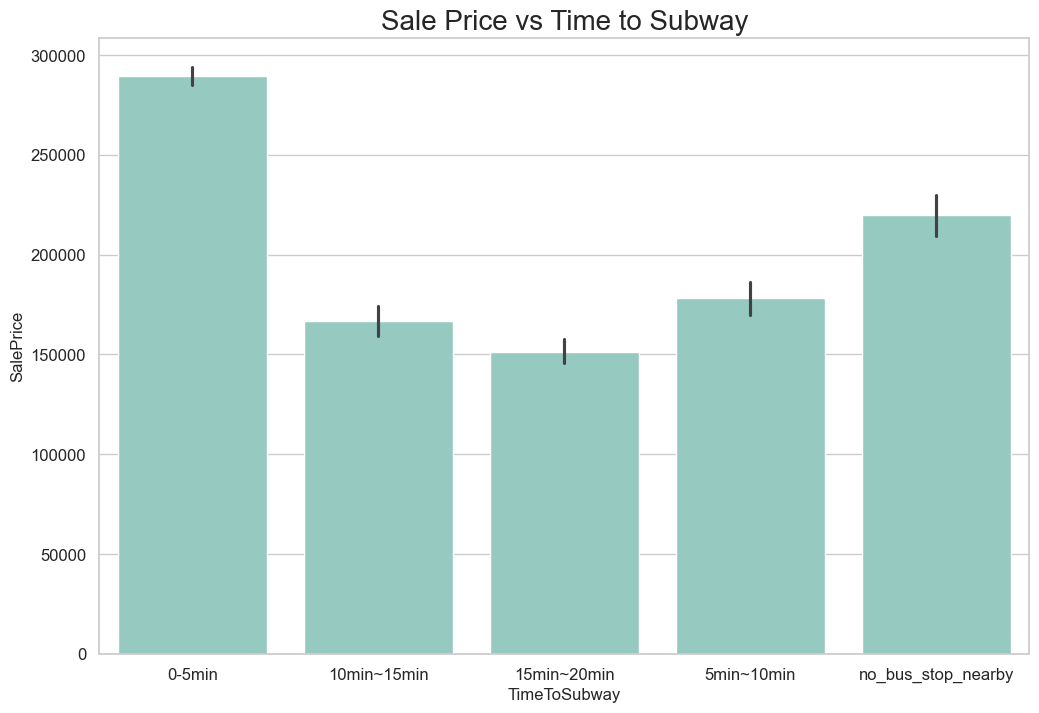

In [1425]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['TimeToSubway'],y=df['SalePrice'])
plt.title('Sale Price vs Time to Subway', size=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

In [1426]:
time_to_subway_price=df.groupby('TimeToSubway')['SalePrice'].mean().reset_index()
time_to_subway_price.sort_values(by='SalePrice',ascending=False)

TimeToSubway      SalePrice
0              0-5min  289297.955462
4  no_bus_stop_nearby  219816.960000
3          5min~10min  178356.964072
1         10min~15min  166846.812207
2         15min~20min  151450.487310

Text(0.5, 1.0, 'Harga Apartment Rata-rata berdasarkan waktu ke subway')

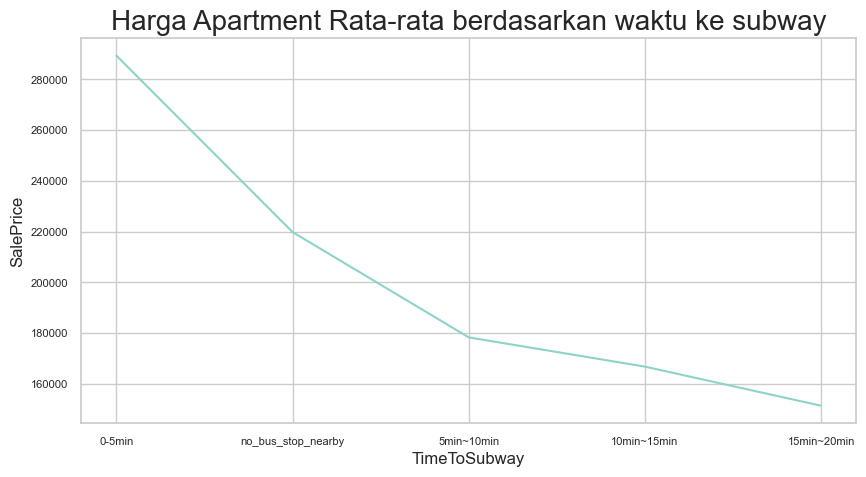

In [1427]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=time_to_subway_price.sort_values(by='SalePrice',ascending=False),x='TimeToSubway', y='SalePrice')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 
plt.title('Harga Apartment Rata-rata berdasarkan waktu ke subway', size=20)

Dari data diatas dapat dilihat, harga apartment paling mahal ketika dekat dengan subway, dan paling mahal paling jauh(15-20 menit).

### Subway Station

In [1428]:
df['SubwayStation'].value_counts()

SubwayStation
Myung-duk                685
Kyungbuk_uni_hospital    649
Sin-nam                  357
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

In [1429]:
subway_price=df.groupby('SubwayStation')['SalePrice'].mean().reset_index()
subway_price.sort_values(by='SalePrice',ascending=False)

SubwayStation      SalePrice
1             Banwoldang  295253.195195
4  Kyungbuk_uni_hospital  259617.827427
6                Sin-nam  240277.647059
7       no_subway_nearby  239197.287234
0                Bangoge  183832.289286
5              Myung-duk  179756.105109
3                  Daegu  138611.388889
2       Chil-sung-market  103090.061538

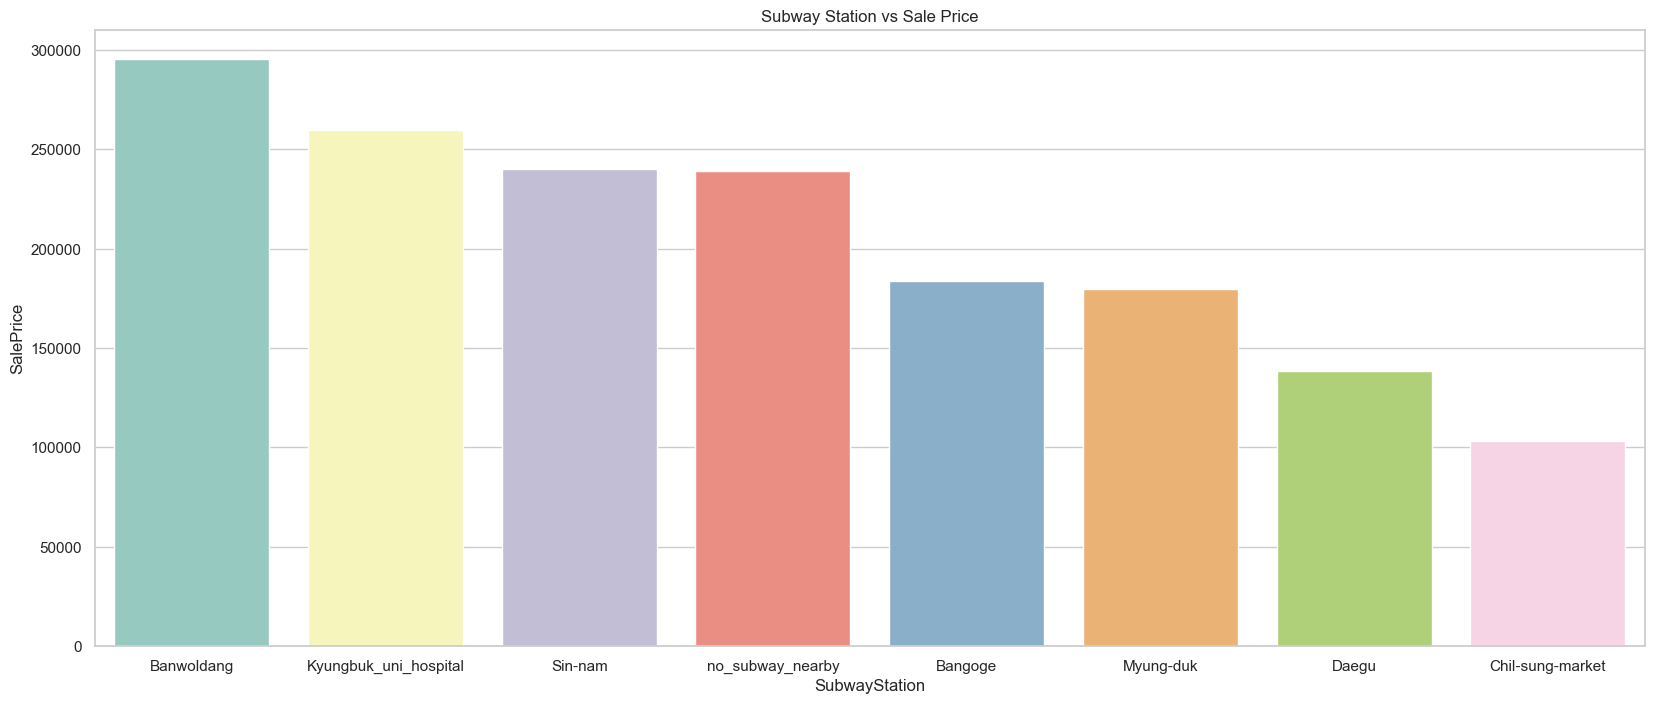

In [1430]:
plt.figure(figsize=(20,8))
sns.barplot(x='SubwayStation', y='SalePrice', data=subway_price.sort_values(by='SalePrice',ascending=False),hue='SubwayStation')
plt.title('Subway Station vs Sale Price')
plt.show()

In [1431]:
df['N_FacilitiesNearBy(ETC)'].value_counts()

N_FacilitiesNearBy(ETC)
0.0    1083
5.0     807
1.0     499
2.0     222
Name: count, dtype: int64

In [1432]:
n_facilities_nearby_price=df.groupby('N_FacilitiesNearBy(ETC)')['SalePrice'].mean().reset_index()
n_facilities_nearby_price.sort_values(by='SalePrice',ascending=False)

N_FacilitiesNearBy(ETC)      SalePrice
0                      0.0  289785.614035
2                      2.0  195030.882883
3                      5.0  180918.438662
1                      1.0  166764.488978

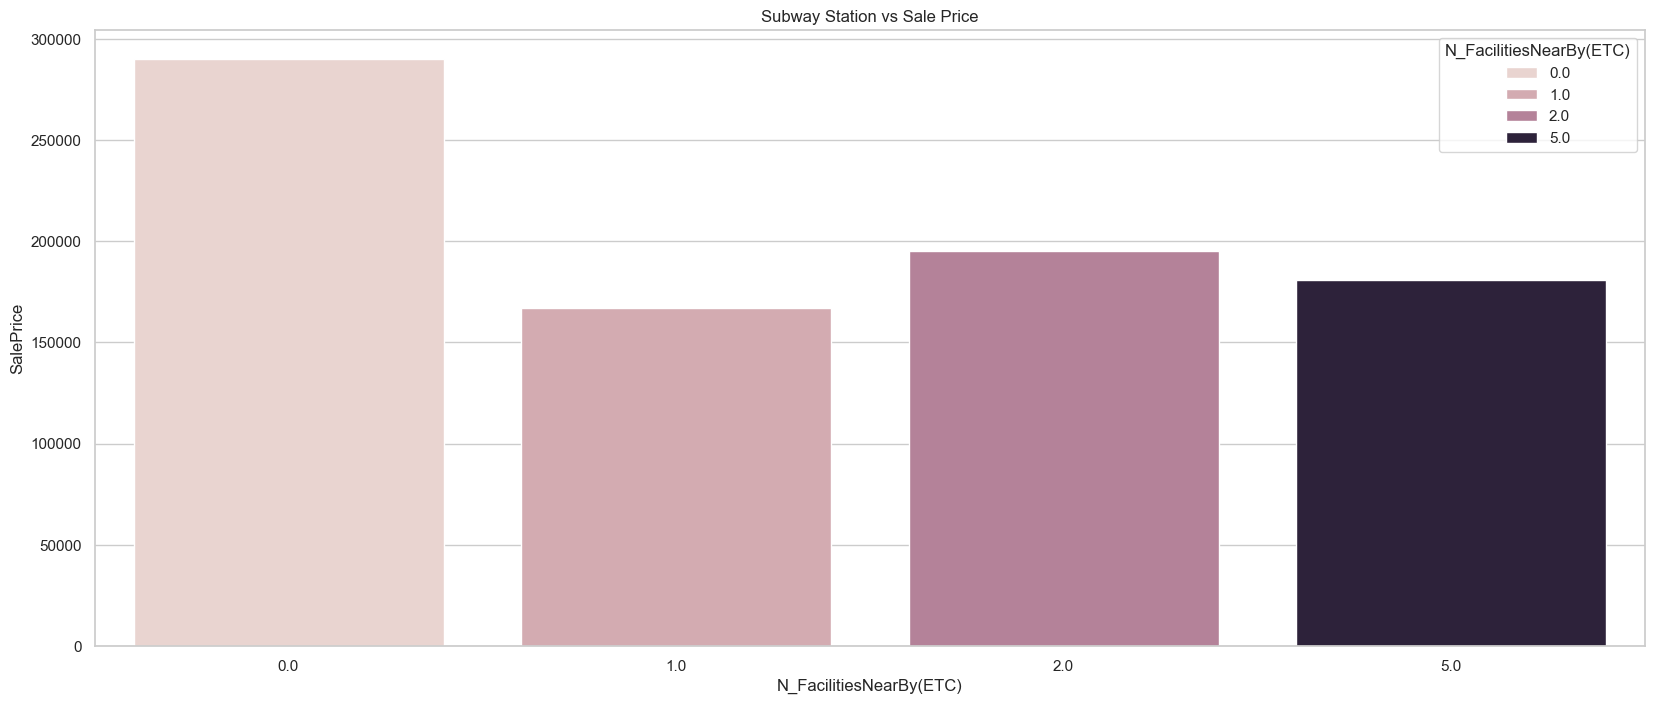

In [1433]:
plt.figure(figsize=(20, 8))
sns.barplot(x='N_FacilitiesNearBy(ETC)', y='SalePrice', data=n_facilities_nearby_price.sort_values(by='SalePrice',ascending=False),hue='N_FacilitiesNearBy(ETC)')
plt.title('Subway Station vs Sale Price')
plt.show()

Saat dicek korelation, antaraN_FacilitiesNear vs SalePrice, mempunyai korelasi negatif yang medium, sehingga semakin jarang jumlah public facilitiesnya semakin mahal harganya

In [1434]:
df['N_FacilitiesNearBy(PublicOffice)'].value_counts()

N_FacilitiesNearBy(PublicOffice)
5.0    693
3.0    556
2.0    387
7.0    340
6.0    252
1.0    218
4.0    137
0.0     28
Name: count, dtype: int64

In [1435]:
n_facilities_pub_nearby_price=df.groupby('N_FacilitiesNearBy(PublicOffice)')['SalePrice'].mean().reset_index()
n_facilities_pub_nearby_price.sort_values(by='SalePrice',ascending=False)

N_FacilitiesNearBy(PublicOffice)      SalePrice
0                               0.0  372376.142857
4                               4.0  309374.021898
1                               1.0  298010.389908
3                               3.0  263911.640288
2                               2.0  239411.961240
5                               5.0  184643.584416
7                               7.0  173387.041176
6                               6.0  167767.456349

In [1436]:
df.head()

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                               1.0                         2.0   

   N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  SalePrice  
0                  1270.0       2007                 10       1387     346017  
1                     0.0       1986                  4        914     150442  
2                    56.0       1997                  5        558      61946  
3                   798.0       2005                  7        914     165486  
4                   536.0       2006                  5       1743     311504

In [1437]:
df['N_SchoolNearBy(University)'].value_counts()

N_SchoolNearBy(University)
2.0    967
1.0    537
5.0    527
4.0    357
3.0    154
0.0     69
Name: count, dtype: int64

In [1438]:
n_univ_nearby_price=df.groupby('N_SchoolNearBy(University)')['SalePrice'].mean().reset_index()
n_univ_nearby_price.sort_values(by='SalePrice',ascending=False)

N_SchoolNearBy(University)      SalePrice
2                         2.0  255949.306101
1                         1.0  254868.994413
3                         3.0  204280.194805
0                         0.0  200436.782609
5                         5.0  179370.282732
4                         4.0  174135.238095

### Price vs parking lot

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_57199/52711173.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df['N_Parkinglot(Basement)'],y=df['SalePrice'],ci=0)


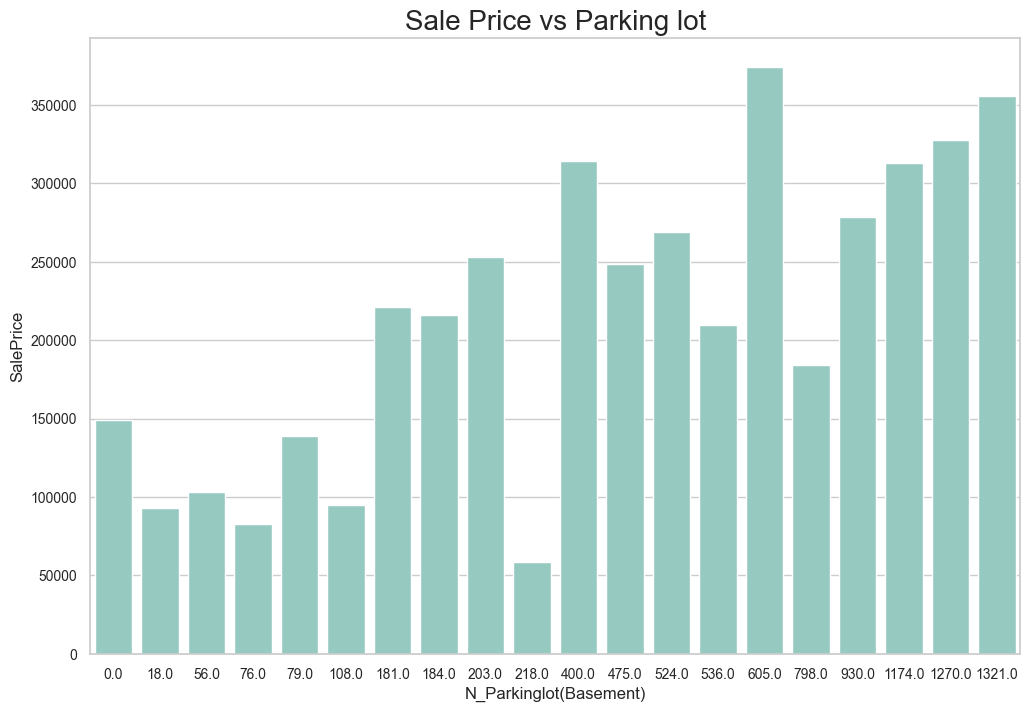

In [1439]:

plt.figure(figsize=(12,8))
sns.barplot(x=df['N_Parkinglot(Basement)'],y=df['SalePrice'],ci=0)
plt.title('Sale Price vs Parking lot', size=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 

plt.show()

In [1440]:
df[df['N_Parkinglot(Basement)'] == 218].head()

HallwayType TimeToSubway     SubwayStation  N_FacilitiesNearBy(ETC)  \
37     corridor   5min~10min  no_subway_nearby                      1.0   
83     corridor   5min~10min  no_subway_nearby                      1.0   
199    corridor   5min~10min  no_subway_nearby                      1.0   
261    corridor   5min~10min  no_subway_nearby                      1.0   
521    corridor   5min~10min  no_subway_nearby                      1.0   

     N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
37                                4.0                         1.0   
83                                4.0                         1.0   
199                               4.0                         1.0   
261                               4.0                         1.0   
521                               4.0                         1.0   

     N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  \
37                    218.0       2014                  1        156   
83                    218.0       2014                  1        135   
199                   218.0       2014                  1        135   
261                   218.0       2014                  1        156   
521                   218.0       2014                  1        135   

     SalePrice  
37       57522  
83       56637  
199      53274  
261      60176  
521      55752

Apartment dengan 218 lot parking memiliki harga rata-rata paling kecil, karena memiliki luas yang realtif kecil saat di cek di data

In [1441]:
df.shape

(2611, 11)

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_57199/52711173.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df['N_Parkinglot(Basement)'],y=df['SalePrice'],ci=0)


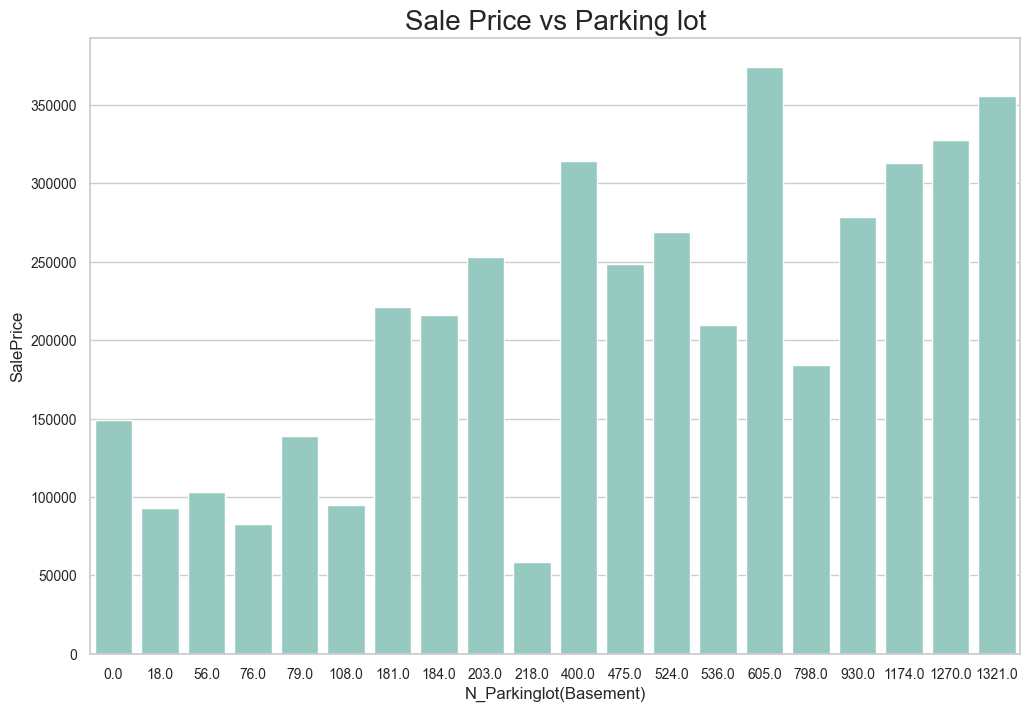

In [1442]:

plt.figure(figsize=(12,8))
sns.barplot(x=df['N_Parkinglot(Basement)'],y=df['SalePrice'],ci=0)
plt.title('Sale Price vs Parking lot', size=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 

plt.show()

### Year build vs price

/var/folders/t6/8lskg22s6sggp2c78yqcyn640000gn/T/ipykernel_57199/1682304990.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x=df['YearBuilt'],y=df['SalePrice'],ci=0)


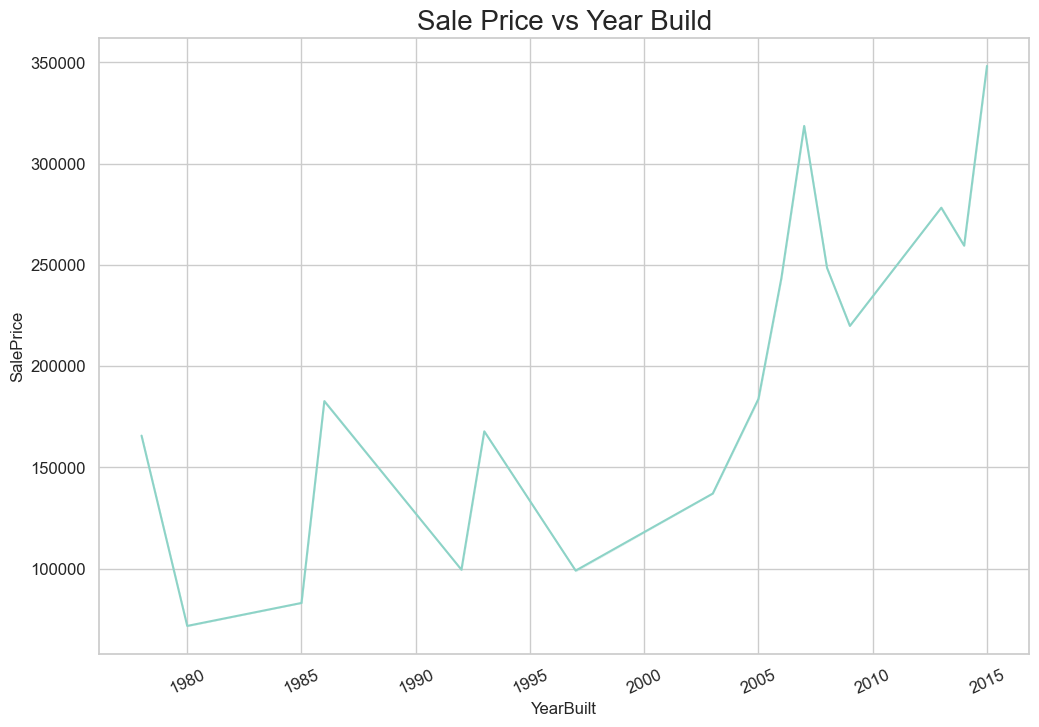

In [1443]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df['YearBuilt'],y=df['SalePrice'],ci=0)
plt.title('Sale Price vs Year Build', size=20)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

Secara garis besar, semakin baru apartment dibangun, semakin tinggi harganya, namun ada faktor lain selain YearBuilt yang mempengaruhi harga jual

In [1444]:
df.describe(include='all')

HallwayType TimeToSubway SubwayStation  N_FacilitiesNearBy(ETC)  \
count         2611         2611          2611              2611.000000   
unique           3            5             8                      NaN   
top       terraced       0-5min     Myung-duk                      NaN   
freq          1601         1190           685                      NaN   
mean           NaN          NaN           NaN                 1.906549   
std            NaN          NaN           NaN                 2.150577   
min            NaN          NaN           NaN                 0.000000   
25%            NaN          NaN           NaN                 0.000000   
50%            NaN          NaN           NaN                 1.000000   
75%            NaN          NaN           NaN                 5.000000   
max            NaN          NaN           NaN                 5.000000   

        N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
count                        2611.000000                 2611.000000   
unique                               NaN                         NaN   
top                                  NaN                         NaN   
freq                                 NaN                         NaN   
mean                            4.046342                    2.679433   
std                             1.884540                    1.507667   
min                             0.000000                    0.000000   
25%                             3.000000                    2.000000   
50%                             4.000000                    2.000000   
75%                             5.000000                    4.000000   
max                             7.000000                    5.000000   

        N_Parkinglot(Basement)   YearBuilt  N_FacilitiesInApt    Size(sqf)  \
count              2611.000000  2611.00000        2611.000000  2611.000000   
unique                     NaN         NaN                NaN          NaN   
top                        NaN         NaN                NaN          NaN   
freq                       NaN         NaN                NaN          NaN   
mean                525.471850  2002.40023           5.683263   946.851015   
std                 415.611063     9.19855           2.367327   340.673791   
min                   0.000000  1978.00000           1.000000   135.000000   
25%                 181.000000  1993.00000           4.000000   743.000000   
50%                 536.000000  2006.00000           5.000000   910.000000   
75%                 798.000000  2007.00000           7.000000  1149.000000   
max                1321.000000  2015.00000          10.000000  1796.000000   

            SalePrice  
count     2611.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    224569.642283  
std     101157.109208  
min      32743.000000  
25%     150442.000000  
50%     216814.000000  
75%     293805.000000  
max     517699.000000

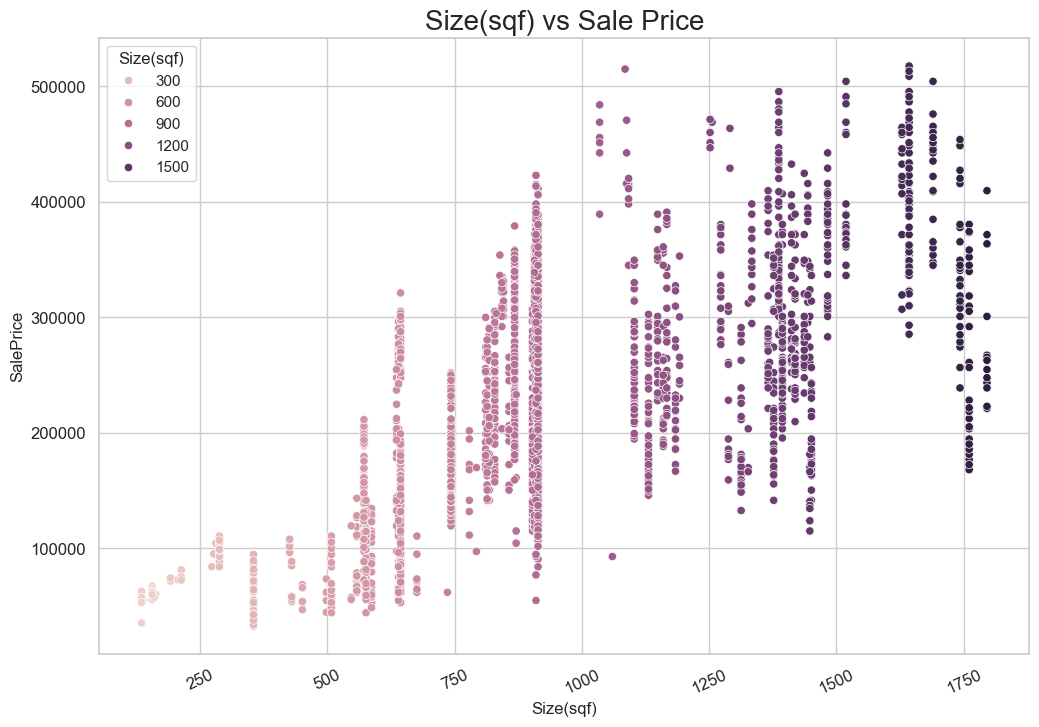

In [1445]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Size(sqf)',y='SalePrice',hue='Size(sqf)')
plt.title('Size(sqf) vs Sale Price', size=20)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

Dari data scatter plot diatas, terlihat semakin luas banguannya, semakin tinggi harganya

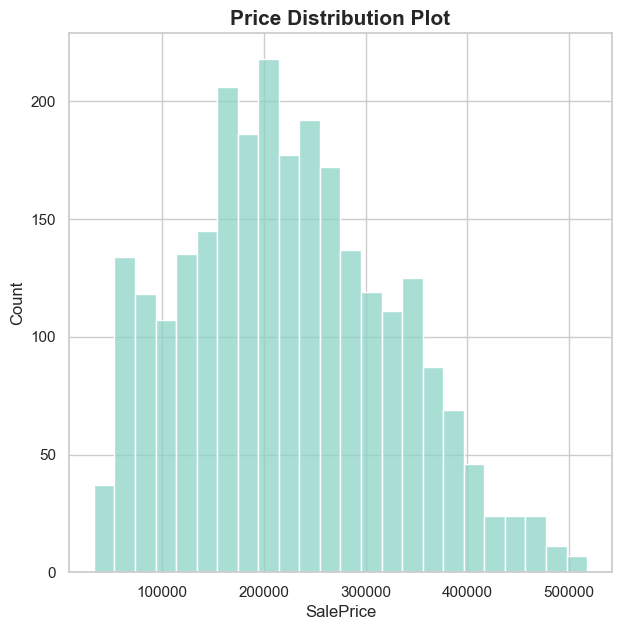

In [1446]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.histplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

plt.show()

Skew right

In [1447]:
# Numerical Features
num_features = [fea for fea in df.describe().columns]
num_features

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)',
 'SalePrice']

In [1448]:
# Sort the DataFrame by the 'SalePrice column in ascending order
df_sorted = df.sort_values(by=['TimeToSubway', 'SalePrice'], ascending=[False, False])
df_sorted.head()

HallwayType        TimeToSubway     SubwayStation  \
3041    terraced  no_bus_stop_nearby  no_subway_nearby   
2402    terraced  no_bus_stop_nearby  no_subway_nearby   
242     terraced  no_bus_stop_nearby  no_subway_nearby   
2129    terraced  no_bus_stop_nearby  no_subway_nearby   
2437    terraced  no_bus_stop_nearby  no_subway_nearby   

      N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
3041                      2.0                               2.0   
2402                      2.0                               2.0   
242                       2.0                               2.0   
2129                      2.0                               2.0   
2437                      2.0                               2.0   

      N_SchoolNearBy(University)  N_Parkinglot(Basement)  YearBuilt  \
3041                         1.0                   203.0       2009   
2402                         1.0                   203.0       2009   
242                          1.0                   203.0       2009   
2129                         1.0                   203.0       2009   
2437                         1.0                   203.0       2009   

      N_FacilitiesInApt  Size(sqf)  SalePrice  
3041                  5       1160     361061  
2402                  5       1160     358407  
242                   5       1160     355752  
2129                  5       1160     345132  
2437                  5        910     307964

In [1449]:
df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1190
5min~10min             501
10min~15min            426
15min~20min            394
no_bus_stop_nearby     100
Name: count, dtype: int64

In [1450]:
df['SubwayStation'].value_counts()

SubwayStation
Myung-duk                685
Kyungbuk_uni_hospital    649
Sin-nam                  357
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

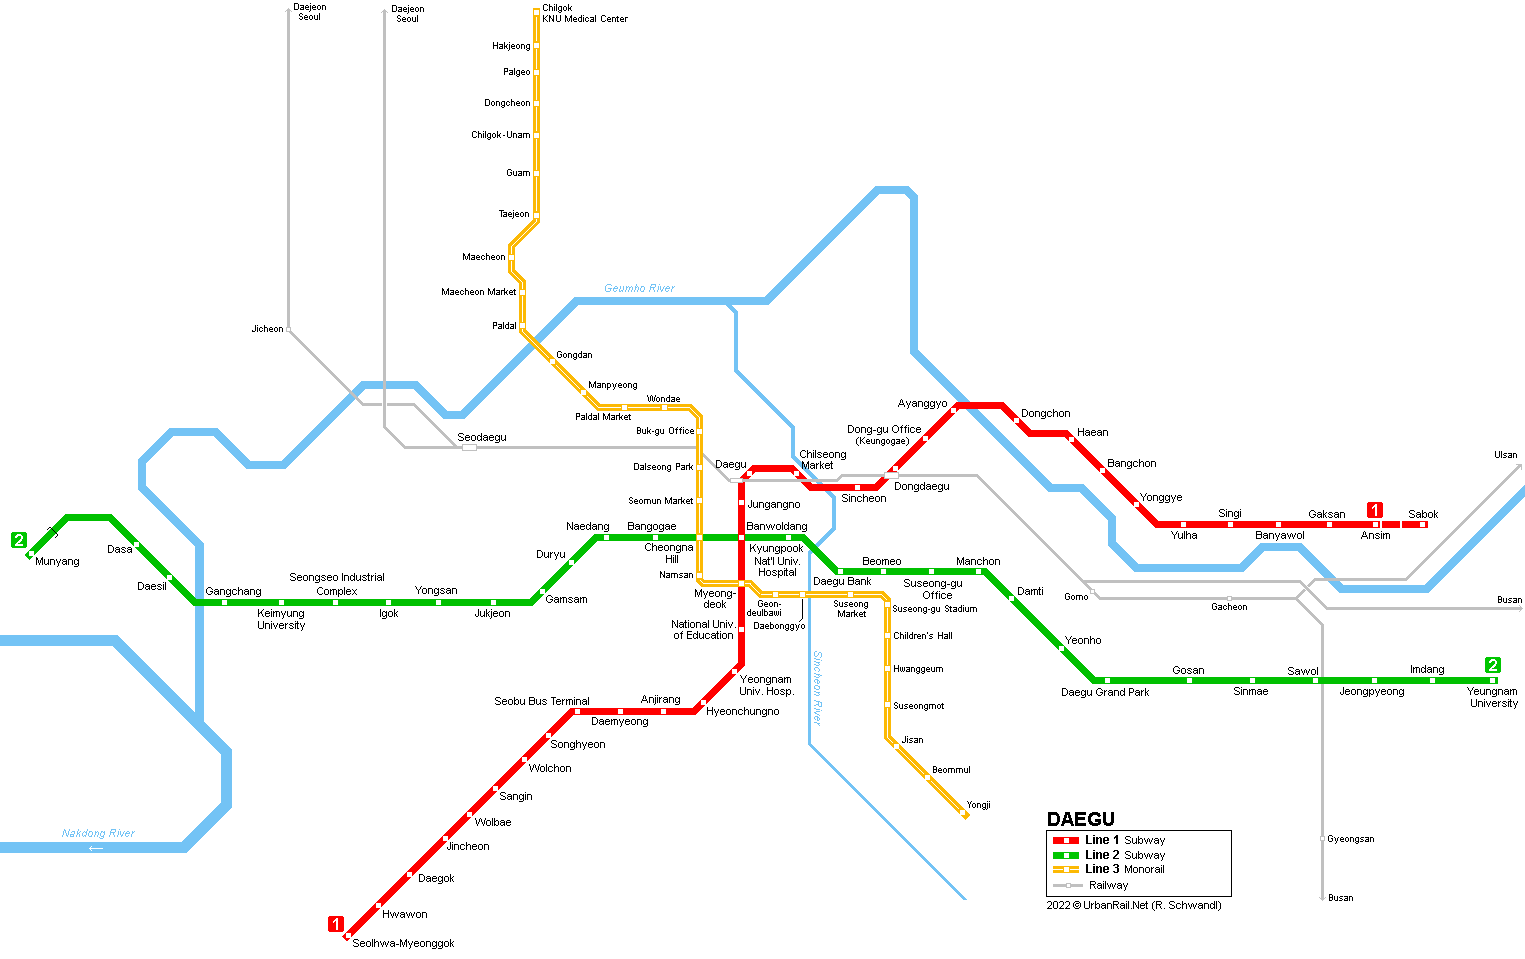

source: https://www.urbanrail.net/as/kr/daegu/daegu.htm

Tidak ada sin-nam subwaystation map, namun setelah dicek lebih lanjut Cheongna Hill dekat dengan sin-nam subwaystation


In [1451]:
df_model=df.copy()

In [1452]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

dataFeatures dataType  null  nullPct  unique  \
0                        HallwayType   object     0      0.0       3   
1                       TimeToSubway   object     0      0.0       5   
2                      SubwayStation   object     0      0.0       8   
3            N_FacilitiesNearBy(ETC)  float64     0      0.0       4   
4   N_FacilitiesNearBy(PublicOffice)  float64     0      0.0       8   
5         N_SchoolNearBy(University)  float64     0      0.0       6   
6             N_Parkinglot(Basement)  float64     0      0.0      20   
7                          YearBuilt    int64     0      0.0      16   
8                  N_FacilitiesInApt    int64     0      0.0       9   
9                          Size(sqf)    int64     0      0.0      85   
10                         SalePrice    int64     0      0.0     809   

                        uniqueSample  
0                  [mixed, terraced]  
1              in~20min, 0-5min]  
2   [Bangoge, Kyungbuk_uni_hospital]  
3                         [0.0, 2.0]  
4                         [2.0, 1.0]  
5                         [2.0, 1.0]  
6                    [184.0, 1270.0]  
7                       [2005, 2006]  
8                             [1, 7]  
9                        [1256, 843]  
10                  [279203, 290000]

In [1453]:
df.describe(include='object')

HallwayType TimeToSubway SubwayStation
count         2611         2611          2611
unique           3            5             8
top       terraced       0-5min     Myung-duk
freq          1601         1190           685

# 3. Define X and y

In [1454]:
import statsmodels.api as sm

In [1455]:
X = df_model.drop(columns='SalePrice')
y = df_model['SalePrice']

X= sm.add_constant(X)
X.head()

const HallwayType TimeToSubway          SubwayStation  \
0    1.0    terraced       0-5min  Kyungbuk_uni_hospital   
1    1.0    terraced  10min~15min  Kyungbuk_uni_hospital   
2    1.0       mixed  15min~20min       Chil-sung-market   
3    1.0       mixed   5min~10min                Bangoge   
4    1.0    terraced       0-5min                Sin-nam   

   N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
0                      0.0                               3.0   
1                      1.0                               5.0   
2                      1.0                               7.0   
3                      5.0                               5.0   
4                      0.0                               1.0   

   N_SchoolNearBy(University)  N_Parkinglot(Basement)  YearBuilt  \
0                         2.0                  1270.0       2007   
1                         1.0                     0.0       1986   
2                         3.0                    56.0       1997   
3                         4.0                   798.0       2005   
4                         2.0                   536.0       2006   

   N_FacilitiesInApt  Size(sqf)  
0                 10       1387  
1                  4        914  
2                  5        558  
3                  7        914  
4                  5       1743

In [1456]:
X.shape

(2611, 11)

In [1457]:
X.columns

Index(['const', 'HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')

In [1458]:
X.values

array([[1.0, 'terraced', '0-5min', ..., 2007, 10, 1387],
       [1.0, 'terraced', '10min~15min', ..., 1986, 4, 914],
       [1.0, 'mixed', '15min~20min', ..., 1997, 5, 558],
       ...,
       [1.0, 'terraced', '0-5min', ..., 2008, 8, 914],
       [1.0, 'mixed', '15min~20min', ..., 1993, 4, 1451],
       [1.0, 'corridor', '5min~10min', ..., 1985, 3, 676]], dtype=object)

In [1459]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 4. Modeling

In [1460]:
mapper = [
    {"col": "TimeToSubway",
     "mapping": {
         'no_bus_stop_nearby': 1,
         '15min~20min': 2,
         '10min~15min': 3,
         '5min~10min': 4,
         '0-5min': 5
     }},
]

pipe_encode_scale = Pipeline([
    ('encoding', OrdinalEncoder(mapping = mapper)),
    ('scaler', RobustScaler())
])

Karena ada tingkatan, saya menggunakan encode ordinal, dan dibuat maper

In [1461]:
# Menjadikan kategorikal menjadi numeric
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['N_Parkinglot(Basement)','YearBuilt','Size(sqf)']),
    ('pipe_encode_scale',pipe_encode_scale,['TimeToSubway']),
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType','SubwayStation'])
    
], remainder='passthrough')

Untuk data" yang kategorikal di transform menjadi numeric dengan onehot dan ordinal, untuk parking lot, yearbuilt dan size, saya lakukan scaling agar rentangnya tidak terlalu jauh

In [1462]:
transformed_X = pd.DataFrame(transformer.fit_transform(X), columns=transformer.get_feature_names_out())
transformed_X.head()

scaler__N_Parkinglot(Basement)  scaler__YearBuilt  scaler__Size(sqf)  \
0                        1.189627           0.071429           1.174877   
1                       -0.868720          -1.428571           0.009852   
2                       -0.777958          -0.642857          -0.866995   
3                        0.424635          -0.071429           0.009852   
4                        0.000000           0.000000           2.051724   

   pipe_encode_scale__TimeToSubway  One Hot__HallwayType_mixed  \
0                              0.5                         0.0   
1                             -0.5                         0.0   
2                             -1.0                         1.0   
3                              0.0                         1.0   
4                              0.5                         0.0   

   One Hot__HallwayType_terraced  One Hot__SubwayStation_Banwoldang  \
0                            1.0                                0.0   
1                            1.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            1.0                                0.0   

   One Hot__SubwayStation_Chil-sung-market  One Hot__SubwayStation_Daegu  \
0                                      0.0                           0.0   
1                                      0.0                           0.0   
2                                      1.0                           0.0   
3                                      0.0                           0.0   
4                                      0.0                           0.0   

   One Hot__SubwayStation_Kyungbuk_uni_hospital  \
0                                           1.0   
1                                           1.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   One Hot__SubwayStation_Myung-duk  One Hot__SubwayStation_Sin-nam  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             1.0   

   One Hot__SubwayStation_no_subway_nearby  remainder__const  \
0                                      0.0               1.0   
1                                      0.0               1.0   
2                                      0.0               1.0   
3                                      0.0               1.0   
4                                      0.0               1.0   

   remainder__N_FacilitiesNearBy(ETC)  \
0                                 0.0   
1                                 1.0   
2                                 1.0   
3                                 5.0   
4                                 0.0   

   remainder__N_FacilitiesNearBy(PublicOffice)  \
0                                          3.0   
1                                          5.0   
2                                          7.0   
3                                          5.0   
4                                          1.0   

   remainder__N_SchoolNearBy(University)  remainder__N_FacilitiesInApt  
0                                    2.0                          10.0  
1                                    1.0                           4.0  
2                                    3.0                           5.0  
3                                    4.0                           7.0  
4                                    2.0                           5.0

# 5. VIF

dilakukan VIF, untuk mengecek multicoloniarity antar feature

In [1463]:
VIF=[variance_inflation_factor(transformed_X.values,i) for i in range(len(transformed_X.columns))]
VIF

[13.75437409620138,
 5.067407916637352,
 2.1203699216085083,
 14.652433327441337,
 15.709727470984806,
 8.581306760507099,
 17.111573996983193,
 3.499241096005574,
 4.027131898237094,
 34.702525983134116,
 11.423986870544146,
 16.723445297500533,
 19.935195375228698,
 363.62347618344296,
 14.703946842013268,
 4.640225780027127,
 11.314041840056493,
 6.149586459118989]

In [1464]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['feature'] =  X.columns
    vif['VIF'] =[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif['acceptance'] = np.where(vif.VIF < 4, 'Yes', 'No')
    return vif

In [1465]:
#tambahkan nama kolom dan VIF kedalam sebuah data frame
df_VIF=pd.DataFrame({
        'feature':transformed_X.columns,
        'VIF':VIF
        })
df_VIF.sort_values('VIF',ascending=False)


feature         VIF
13                              remainder__const  363.623476
9   One Hot__SubwayStation_Kyungbuk_uni_hospital   34.702526
12       One Hot__SubwayStation_no_subway_nearby   19.935195
6              One Hot__SubwayStation_Banwoldang   17.111574
11                One Hot__SubwayStation_Sin-nam   16.723445
4                     One Hot__HallwayType_mixed   15.709727
14            remainder__N_FacilitiesNearBy(ETC)   14.703947
3                pipe_encode_scale__TimeToSubway   14.652433
0                 scaler__N_Parkinglot(Basement)   13.754374
10              One Hot__SubwayStation_Myung-duk   11.423987
16         remainder__N_SchoolNearBy(University)   11.314042
5                  One Hot__HallwayType_terraced    8.581307
17                  remainder__N_FacilitiesInApt    6.149586
1                              scaler__YearBuilt    5.067408
15   remainder__N_FacilitiesNearBy(PublicOffice)    4.640226
8                   One Hot__SubwayStation_Daegu    4.027132
7        One Hot__SubwayStation_Chil-sung-market    3.499241
2                              scaler__Size(sqf)    2.120370

In [1466]:
df_VIF['acceptance']= np.where(df_VIF.VIF<4,'Yes','No')
df_VIF.sort_values('VIF',ascending=False)

feature         VIF acceptance
13                              remainder__const  363.623476         No
9   One Hot__SubwayStation_Kyungbuk_uni_hospital   34.702526         No
12       One Hot__SubwayStation_no_subway_nearby   19.935195         No
6              One Hot__SubwayStation_Banwoldang   17.111574         No
11                One Hot__SubwayStation_Sin-nam   16.723445         No
4                     One Hot__HallwayType_mixed   15.709727         No
14            remainder__N_FacilitiesNearBy(ETC)   14.703947         No
3                pipe_encode_scale__TimeToSubway   14.652433         No
0                 scaler__N_Parkinglot(Basement)   13.754374         No
10              One Hot__SubwayStation_Myung-duk   11.423987         No
16         remainder__N_SchoolNearBy(University)   11.314042         No
5                  One Hot__HallwayType_terraced    8.581307         No
17                  remainder__N_FacilitiesInApt    6.149586         No
1                              scaler__YearBuilt    5.067408         No
15   remainder__N_FacilitiesNearBy(PublicOffice)    4.640226         No
8                   One Hot__SubwayStation_Daegu    4.027132         No
7        One Hot__SubwayStation_Chil-sung-market    3.499241        Yes
2                              scaler__Size(sqf)    2.120370        Yes

In [1467]:
transformed_X = transformed_X.drop(columns=['remainder__const','remainder__N_SchoolNearBy(University)','remainder__N_FacilitiesInApt','remainder__N_FacilitiesNearBy(PublicOffice)','One Hot__HallwayType_terraced'])
transformed_X_vif=calc_vif(transformed_X).sort_values('VIF',ascending=False)
transformed_X_vif

feature       VIF acceptance
12            remainder__N_FacilitiesNearBy(ETC)  4.779159         No
3                pipe_encode_scale__TimeToSubway  4.679545         No
4                     One Hot__HallwayType_mixed  4.119649         No
0                 scaler__N_Parkinglot(Basement)  3.613792        Yes
1                              scaler__YearBuilt  3.290424        Yes
9               One Hot__SubwayStation_Myung-duk  2.687552        Yes
11       One Hot__SubwayStation_no_subway_nearby  1.796649        Yes
5              One Hot__SubwayStation_Banwoldang  1.676004        Yes
2                              scaler__Size(sqf)  1.510613        Yes
10                One Hot__SubwayStation_Sin-nam  1.485479        Yes
8   One Hot__SubwayStation_Kyungbuk_uni_hospital  1.413760        Yes
6        One Hot__SubwayStation_Chil-sung-market  1.284604        Yes
7                   One Hot__SubwayStation_Daegu  1.127771        Yes

Untuk VIF 4.7, 4.6 dan 4.1 saya tidak hapus karena masih dalam batas toleransi (dibawah 5).
tranformed_X, merupakan data frame yang sudah di transform dan VIF, yang kemudian akan displit

# 6. Spliting

In [1468]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    transformed_X,
    y,  
    test_size=0.2,
    random_state=0)

# 7. Bench mark model

In [1469]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso

### PIlih Algoritma terbaik

dilakukan proses pemilihan model terbaik yang meliputi
- Lasso
- Ridge
- Linier Regressien
- KNN Neighbors
- Decission Tree
- Random Forest Regressor
- Adaboost Regresor
- XGBoost Regressor

In [1470]:
scorer = [
    'neg_root_mean_squared_error', 
    'neg_mean_absolute_error', 
    'neg_mean_absolute_percentage_error'
    ]

In [1471]:
# Define algoritma yang digunakan
lasso= Lasso(max_iter=1000, random_state=0)
ridge = Ridge()
lr = LinearRegression(n_jobs=-1)
knn = KNeighborsRegressor(n_neighbors=3)
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100,random_state=0)
adagb = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0,n_jobs=-1)


# Kandidat algoritma
models = [lasso,ridge,lr,knn,tree,rf,adagb,xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    #ini bisa

    estimator = Pipeline([
        # ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv = cross_validate(
        estimator=estimator,
        X=X_train, 
        y=y_train, 
        cv=cv, 
        scoring=scorer
        )
    
    nilai_mean_rmse.append(model_cv['test_neg_root_mean_squared_error'].mean())
    nilai_std_rmse.append(model_cv['test_neg_root_mean_squared_error'].std())

    nilai_mean_mae.append(model_cv['test_neg_mean_absolute_error'].mean())
    nilai_std_mae.append(model_cv['test_neg_mean_absolute_error'].std())

    nilai_mean_mape.append(model_cv['test_neg_mean_absolute_percentage_error'].mean())
    nilai_std_mape.append(model_cv['test_neg_mean_absolute_percentage_error'].std())


In [1472]:

train_score=pd.DataFrame({
    'Model': ['Lasso','Ridge','Linear Regression','KNN','Decision Tree','Random Forest', 'Adaboost','XGBoost'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

train_score

Model     Mean_RMSE     Std_RMSE      Mean_MAE      Std_MAE  \
0              Lasso -52950.981351   657.456547 -43661.951478   505.261845   
1              Ridge -52935.187754   642.659084 -43651.138507   512.352917   
2  Linear Regression -52952.161213   659.184224 -43662.920303   504.548182   
3                KNN -50407.080708  1801.653096 -39776.800811  1621.804391   
4      Decision Tree -45387.573467  1299.312937 -36777.938521  1148.036193   
5      Random Forest -45320.362543  1226.797299 -36747.589378  1153.378950   
6           Adaboost -49992.590961   732.261608 -42207.314521  1099.741359   
7            XGBoost -45174.559363  1284.303944 -36639.701226  1178.179434   

   Mean_MAPE  Std_MAPE  
0  -0.235756  0.006452  
1  -0.235483  0.006629  
2  -0.235787  0.006428  
3  -0.211789  0.008082  
4  -0.194714  0.004237  
5  -0.194170  0.004336  
6  -0.241268  0.014686  
7  -0.192696  0.005132

dari 8 model, Decission tree, Random forest dan XGBoost merupakan model yang terbaik, karena masih ada 3 dan selisihnya tidak jauh, saya memutuskan untuk melakukan benchmark test ke 3 model tersebut

### Benchmark 3 model terbaik

In [1473]:
# Benchmark 3 model terbaik
models = {
    'dt': DecisionTreeRegressor(random_state=0),
    'rf': RandomForestRegressor(random_state=0),
    'xgb': XGBRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []


# Prediksi pada test set
for i in models:
    model = Pipeline([
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))


# Use a list of tuples for creating the DataFrame
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

score_before_tuning



RMSE           MAE      MAPE
dt   44945.751902  35865.487520  0.187665
rf   44926.276499  35907.661348  0.188021
xgb  44929.284007  35845.405884  0.187598

Model decision tree paling bagus score RMSEnya, tapi saya akan melakukan hyper tuning untuk ketiga model, untuk membuktikan apakah model terbaik jika di hypertuning pasti aka terbaik dri ketiga model tersebut

# 8. Hyperparametertuning best 3 model terbaik: Decission Tree, Random forest, XGBoost

Pada tuning model dibawah akan menggunakan randomsearch untuk mempercepat proses

## Decision tree

In [1474]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [1475]:
hyperparam_decision_tree = {
    'modeling__max_depth': range(2, 500, 1),
    'modeling__min_samples_split': range(2,500, 1),
    'modeling__min_samples_leaf' : range(2, 500, 1),
    'modeling__max_features':range(2, 100, 1),
    'modeling__max_leaf_nodes': range(2, 500, 1)
}

In [1476]:
#TUNING DT
dtree = DecisionTreeRegressor(random_state=0)

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_dtree = Pipeline([
    ('modeling', dtree)
])

Random_search_dtree = RandomizedSearchCV(
estimator=pipe_dtree,
param_distributions =hyperparam_decision_tree,
cv=crossval,
scoring=scorer,
refit='neg_root_mean_squared_error',
n_jobs=-1,
n_iter= 1000,
error_score='raise'
)

In [1477]:
Random_search_dtree.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('modeling',
                                              DecisionTreeRegressor(random_state=0))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 500),
                                        'modeling__max_features': range(2, 100),
                                        'modeling__max_leaf_nodes': range(2, 500),
                                        'modeling__min_samples_leaf': range(2, 500),
                                        'modeling__min_samples_split': range(2, 500)},
                   refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [1478]:

dt_score_rmse = []
dt_score_mae = []
dt_score_mape = []

# Prediksi pada test set
model_dt = Pipeline([
    ('model', dtree)])

model_dt.fit(X_train, y_train)
y_pred_before_dt = model_dt.predict(X_test)
dt_score_mape.append(mean_absolute_percentage_error(y_test, y_pred_before_dt))
dt_score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_before_dt)))
dt_score_mae.append(mean_absolute_error(y_test, y_pred_before_dt))


# Use a list of tuples for creating the DataFrame
score_dtree_before_tuning = pd.DataFrame({
    'Score RMSE': dt_score_rmse,
    'Score MAE': dt_score_mae,
    'Score MAPE': dt_score_mape
    
}, index=['Decision Before Tree'])

score_dtree_before_tuning

Score RMSE    Score MAE  Score MAPE
Decision Before Tree  44945.751902  35865.48752    0.187665

After tuning


In [1479]:
Random_search_dtree.best_estimator_

Pipeline(steps=[('modeling',
                 DecisionTreeRegressor(max_depth=303, max_features=12,
                                       max_leaf_nodes=188, min_samples_leaf=7,
                                       min_samples_split=14, random_state=0))])

**Predict to Test Set with the Tuned Model**

In [1480]:
#after tuning

dt_tuning = Random_search_dtree.best_estimator_

dt_tuning.fit(X_train, y_train)

y_pred_dt_tuning = dt_tuning.predict(X_test)

mae_dt_tuning = mean_absolute_error(y_test, y_pred_dt_tuning)
mape_dt_tuning = mean_absolute_percentage_error(y_test, y_pred_dt_tuning)
rmse_dt_tuning = np.sqrt(mean_squared_error(y_test, y_pred_dt_tuning))


score_dt_after_tuning = pd.DataFramescore_after_tuning = pd.DataFrame({
    'Score RMSE': [rmse_dt_tuning],
    'Score MAE': [mae_dt_tuning],
    'Score MAPE': [mape_dt_tuning]

}, index=["Decision Tree After tuning"])

score_dt_after_tuning

Score RMSE     Score MAE  Score MAPE
Decision Tree After tuning  45054.319396  36034.929333    0.188323

In [1481]:
score_dtree_before_tuning

Score RMSE    Score MAE  Score MAPE
Decision Before Tree  44945.751902  35865.48752    0.187665

# Random Fores Regressor

In [1482]:
hyperparam_random_forest = {
    'modeling__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'modeling__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'modeling__min_samples_split': range(2,100, 1),  # Minimum number of samples required to split an internal node
    'modeling__min_samples_leaf': range(2,100, 1),  # Minimum number of samples required to be at a leaf node
    'modeling__max_features': range(2,100, 1),  # Number of features to consider for the best split
    'modeling__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


In [1483]:

rf_model = RandomForestRegressor(random_state=0)

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_rf = Pipeline([
    ('modeling', rf_model)
])

Random_search_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=hyperparam_random_forest,  # Use the hyperparameters for Random Forest
    cv=crossval,
    scoring=scorer,
    refit='neg_root_mean_squared_error',
    n_jobs=-1,
    n_iter=1000,
    error_score='raise'
)

In [1484]:
best_rf_model=Random_search_rf.fit(X_train, y_train)

In [1485]:
rf_score_rmse = []
rf_score_mae = []
rf_score_mape = []

# Predictions on the test set
model_rf = Pipeline([
    # ('preprocessing', transformer),
    ('modeling', rf_model)])

model_rf.fit(X_train, y_train)
y_pred_before_rf = model_rf.predict(X_test)
rf_score_mape.append(mean_absolute_percentage_error(y_test, y_pred_before_rf))
rf_score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_before_rf)))
rf_score_mae.append(mean_absolute_error(y_test, y_pred_before_rf))

# Use a list of tuples for creating the DataFrame
score_rf_before_tuning = pd.DataFrame({
    'Score RMSE': rf_score_rmse,
    'Score MAE': rf_score_mae,
    'Score MAPE': rf_score_mape
    
}, index=['Random Forest Before Tuning'])

score_rf_before_tuning

Score RMSE     Score MAE  Score MAPE
Random Forest Before Tuning  44926.276499  35907.661348    0.188021

In [1486]:
#Random forest after tuning
rf_tuning = Random_search_rf.best_estimator_

rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)

mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))

score_rf_after_tuning = pd.DataFrame({
    'Score RMSE': [rmse_rf_tuning],
    'Score MAE': [mae_rf_tuning],
    'Score MAPE': [mape_rf_tuning]

}, index=["Random Forest After tuning"])

score_rf_after_tuning


Score RMSE     Score MAE  Score MAPE
Random Forest After tuning  44923.242832  35936.218993    0.187601

# XGBOOST

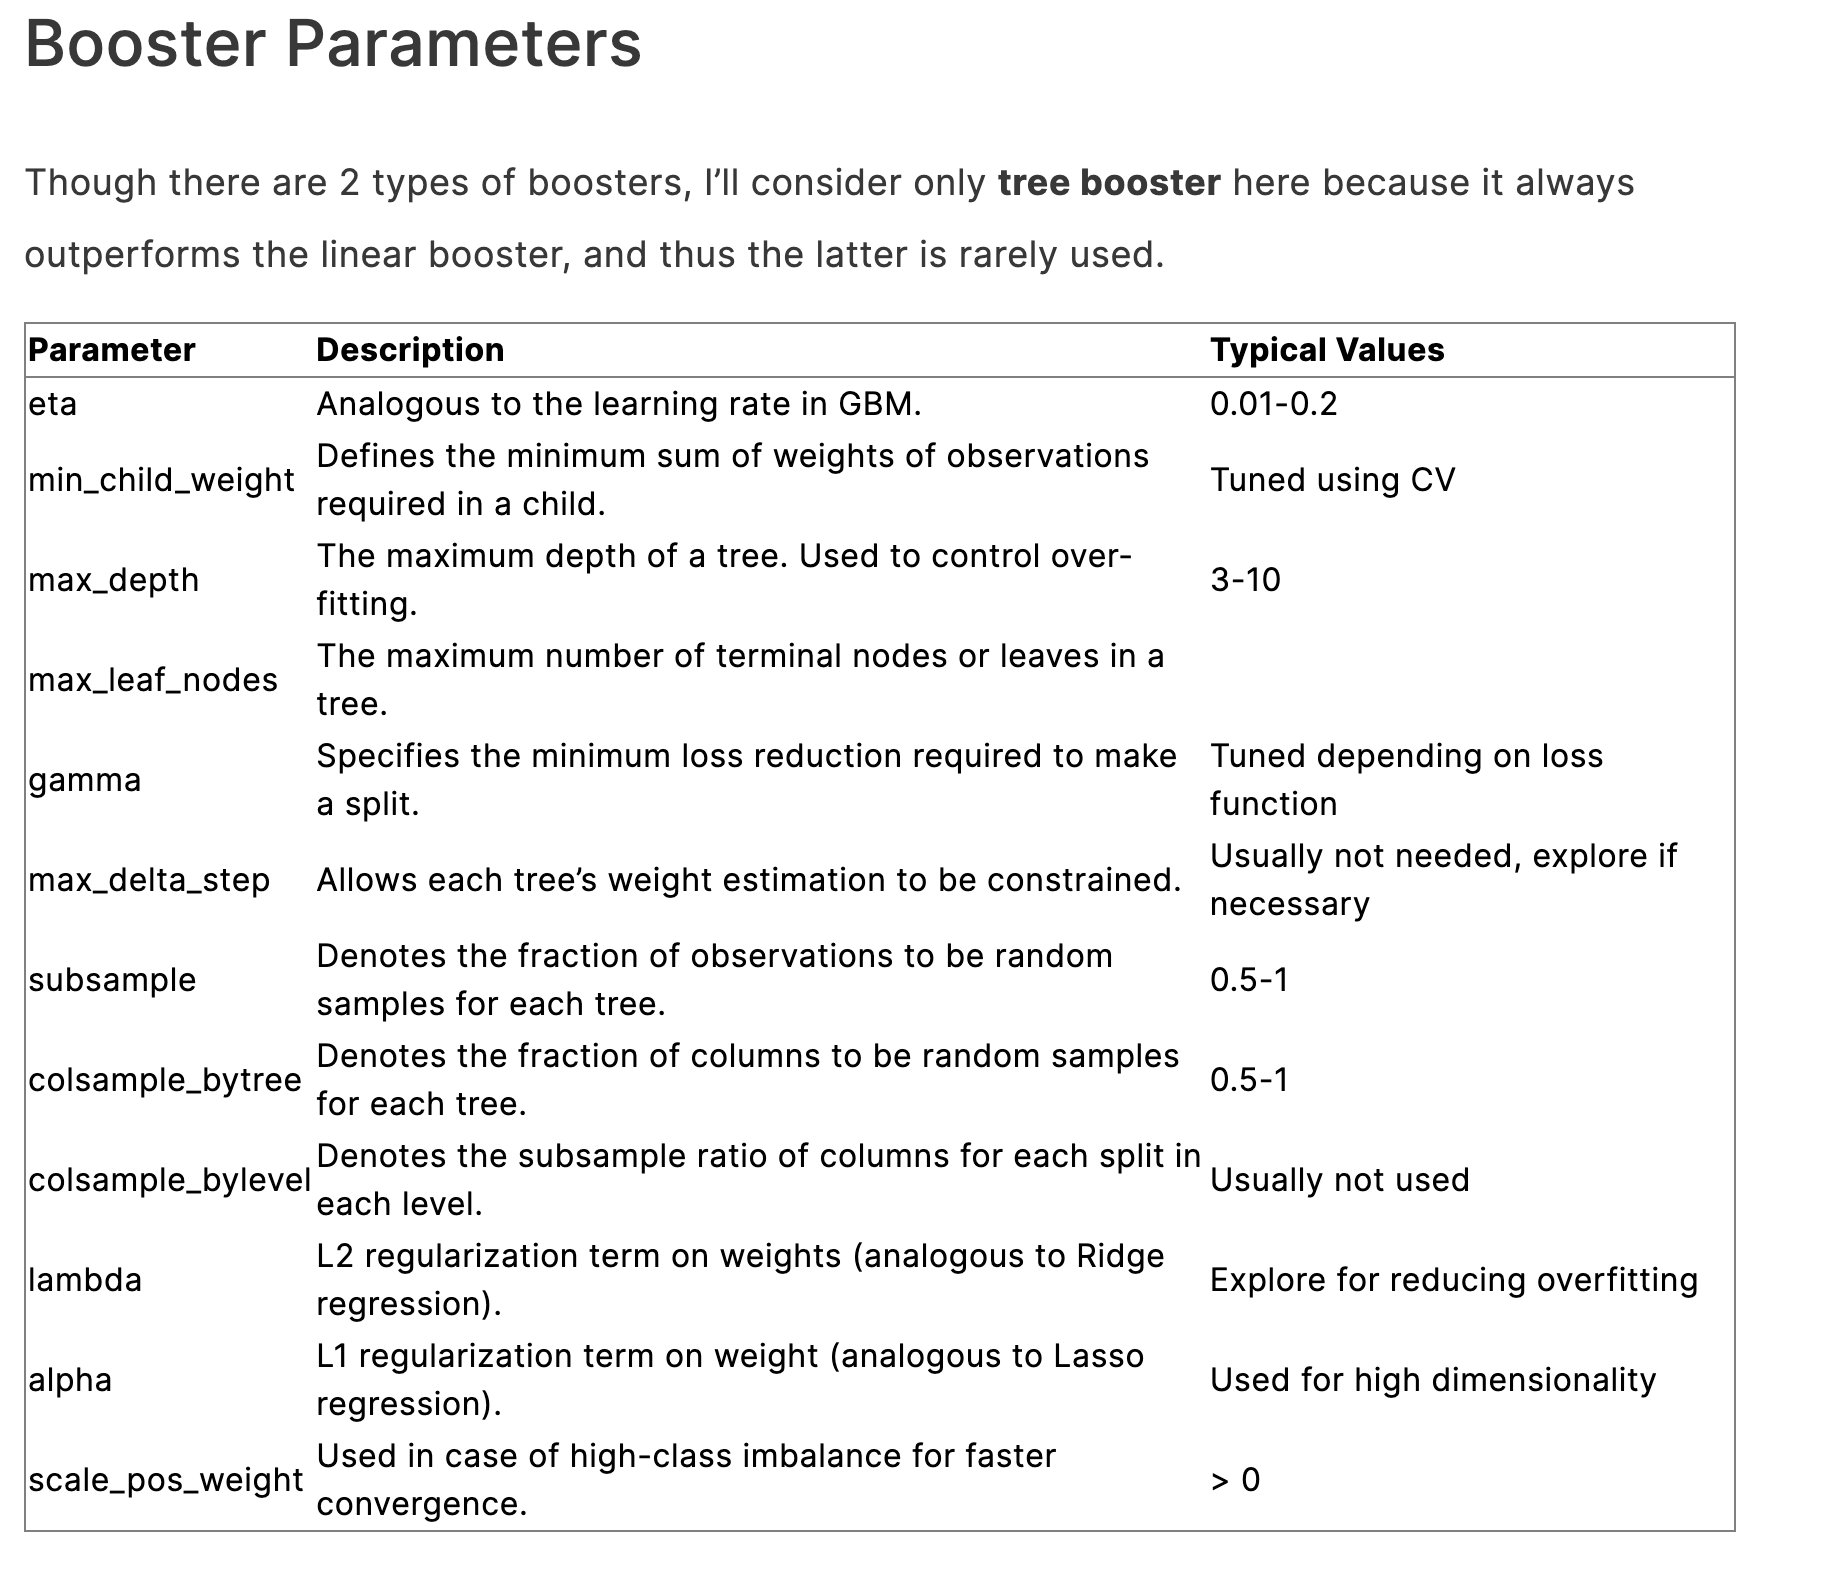

source: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [1487]:
hyperparam_xgboost = {
    'modeling__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in boosting
    'modeling__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'modeling__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'modeling__min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'modeling__subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'modeling__colsample_bytree': [0.8, 1.0],  # Subsample ratio of features when constructing each tree
    'modeling__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
}




In [1488]:
xgb_model = XGBRegressor(random_state=0)

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_xgb = Pipeline([
    ('modeling', xgb_model)
])

Random_search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=hyperparam_xgboost,  # Use the hyperparameters for XGBoost
    cv=crossval,
    scoring=scorer,
    refit='neg_root_mean_squared_error',
    n_jobs=-1,
    n_iter=1000,
    error_score='raise'
)


In [1489]:
xgb_best=Random_search_xgb.fit(X_train,y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 972 is smaller than n_iter=1000. Running 972 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [1490]:
xgb_score_rmse = []
xgb_score_mae = []
xgb_score_mape = []

# Predictions on the test set
model_xgb = Pipeline([
    ('model', xgb_model)])

model_xgb.fit(X_train, y_train)
y_pred_before_xgb = model_xgb.predict(X_test)
xgb_score_mape.append(mean_absolute_percentage_error(y_test,y_pred_before_xgb))
xgb_score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_before_xgb)))
xgb_score_mae.append(mean_absolute_error(y_test, y_pred_before_xgb))

# Use a list of tuples for creating the DataFrame
score_xgb_before_tuning = pd.DataFrame({
    'Score RMSE': xgb_score_rmse,
    'Score MAE': xgb_score_mae,
    'Score MAPE': xgb_score_mape
    
}, index=['XGBoost Before Tuning'])

score_xgb_before_tuning

Score RMSE     Score MAE  Score MAPE
XGBoost Before Tuning  44929.284007  35845.405884    0.187598

In [1491]:
model_xgb_tuning = {'XGBoost': Random_search_xgb.best_estimator_}

xgb_tuning = model_xgb_tuning['XGBoost']

xgb_tuning.fit(X_train, y_train)

y_pred_xgb_tuning = xgb_tuning.predict(X_test)

mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))

score_xgb_after_tuning = pd.DataFrame({
    'Score RMSE': [rmse_xgb_tuning],
    'Score MAE': [mae_xgb_tuning],
    'Score MAPE': [mape_xgb_tuning]

}, index=["XGBoost After tuning"])

score_xgb_after_tuning


Score RMSE    Score MAE  Score MAPE
XGBoost After tuning  44699.144067  35820.13707    0.187807

### **Perform COmparison**

In [1492]:

result_df = pd.concat([score_rf_before_tuning,score_rf_after_tuning,score_dtree_before_tuning,score_dt_after_tuning,score_xgb_before_tuning,score_xgb_after_tuning], axis=0)

result_df

Score RMSE     Score MAE  Score MAPE
Random Forest Before Tuning  44926.276499  35907.661348    0.188021
Random Forest After tuning   44923.242832  35936.218993    0.187601
Decision Before Tree         44945.751902  35865.487520    0.187665
Decision Tree After tuning   45054.319396  36034.929333    0.188323
XGBoost Before Tuning        44929.284007  35845.405884    0.187598
XGBoost After tuning         44699.144067  35820.137070    0.187807

## XGBOOST

Berdasarkan hasil tuning terdapat peningkatan hasil walau tidak significant dari RMSE dan MAE, XGBoost memiliki score RMSE terendah dibanding model Decision Tree dan Random Forest, karena dari awal parameter metric utama yang diutamakan adalah RMSE, sehingga RMSE menjadi patokan utama.

Kesimpulan: XGBOOST merupakan model terbaik, jika dilihat dari RMSE dan MAE

Info mengenai kelebihan XGBOOST

https://towardsdatascience.com/forecasting-stock-prices-using-xgboost-a-detailed-walk-through-7817c1ff536a

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/#:~:text=XGBoost%20and%20Random%20Forest%20are,performance%2C%20especially%20for%20structured%20data.

https://machinelearningmastery.com/xgboost-for-regression/

In [1506]:
# hasil dari randomsearch
pd.DataFrame(Random_search_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
58        0.035673      0.009742         0.004906        0.006315   
220       0.031769      0.017405         0.003459        0.003624   
382       0.028524      0.005954         0.001667        0.000050   

    param_modeling__subsample param_modeling__n_estimators  \
58                        0.8                          200   
220                       0.8                          200   
382                       0.8                          200   

    param_modeling__min_child_weight param_modeling__max_depth  \
58                                 1                         3   
220                                1                         3   
382                                1                         3   

    param_modeling__learning_rate param_modeling__gamma  \
58                            0.1                     0   
220                           0.1                   0.1   
382                           0.1                   0.2   

    param_modeling__colsample_bytree  \
58                               0.8   
220                              0.8   
382                              0.8   

                                                                                                                                                                                                                params  \
58     {'modeling__subsample': 0.8, 'modeling__n_estimators': 200, 'modeling__min_child_weight': 1, 'modeling__max_depth': 3, 'modeling__learning_rate': 0.1, 'modeling__gamma': 0, 'modeling__colsample_bytree': 0.8}   
220  {'modeling__subsample': 0.8, 'modeling__n_estimators': 200, 'modeling__min_child_weight': 1, 'modeling__max_depth': 3, 'modeling__learning_rate': 0.1, 'modeling__gamma': 0.1, 'modeling__colsample_bytree': 0.8}   
382  {'modeling__subsample': 0.8, 'modeling__n_estimators': 200, 'modeling__min_child_weight': 1, 'modeling__max_depth': 3, 'modeling__learning_rate': 0.1, 'modeling__gamma': 0.2, 'modeling__colsample_bytree': 0.8}   

     split0_test_neg_root_mean_squared_error  \
58                             -45677.303716   
220                            -45677.303716   
382                            -45677.303716   

     split1_test_neg_root_mean_squared_error  \
58                             -43703.630813   
220                            -43703.630813   
382                            -43703.630813   

     split2_test_neg_root_mean_squared_error  \
58                             -43627.578498   
220                            -43627.578498   
382                            -43627.578498   

     split3_test_neg_root_mean_squared_error  \
58                              -47154.13048   
220                             -47154.13048   
382                             -47154.13048   

     split4_test_neg_root_mean_squared_error  \
58                             -45723.127401   
220                            -45723.127401   
382                            -45723.127401   

     mean_test_neg_root_mean_squared_error  \
58                           -45177.154182   
220                          -45177.154182   
382                          -45177.154182   

     std_test_neg_root_mean_squared_error  \
58                             1343.81007   
220                            1343.81007   
382                            1343.81007   

     rank_test_neg_root_mean_squared_error  \
58                                       1   
220                                      1   
382                                      1   

     split0_test_neg_mean_absolute_error  split1_test_neg_mean_absolute_error  \
58                         -36879.313061                        -35787.839545   
220                        -36879.313061                        -35787.839545   
382                        -36879.313061                        -35787.839545   

     split2_test_neg_mean_absolute_error  split3_test_neg_mean_absolute_error  \
58                   

# Residual Plot

In [1493]:
df_error = pd.DataFrame({
    'y_pred':y_pred,                # sb X: y_pred
    'error': (y_test - y_pred)      # sb Y: error (y_test - y_pred)
})

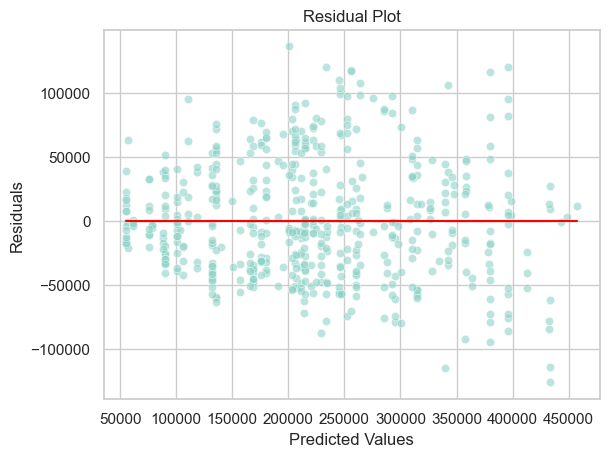

In [1494]:
sns.scatterplot(data=df_error, x='y_pred', y='error',alpha=0.6)
sns.lineplot(data=df_error, x='y_pred', y=0, color='r')
plt.xlabel('Predicted Values')  
plt.ylabel('Residuals')  
plt.title('Residual Plot')  
plt.grid(True) 
plt.show()


Kesimpulan
Interpretation of Gauss_Markov asumption:

a. Rata-rata residual mendekati 0
- Terpenuhi, karena rata-rata error bernilai 0.00.. -> mendekati 0
- Artinya nilai positif dan negatif sama banyak

b. Uncorelated error
- Terpenuhi(Unbiassed terpenuhi), karena tidak ada pola tertentu, seperti persebaran berbentuk kurva

### **Interpretation dari Linear Regression**
1. Multicollinearity: Sudah tidak ada multicollinearity
2. Normality of Residual (error): Terpenuhi, karanea mendekati terdistribusi normal
3. Gauss-Markov Assumption: Tidak terpenuhi, karena Heteroscedasticity

## Actual Vs Prediction

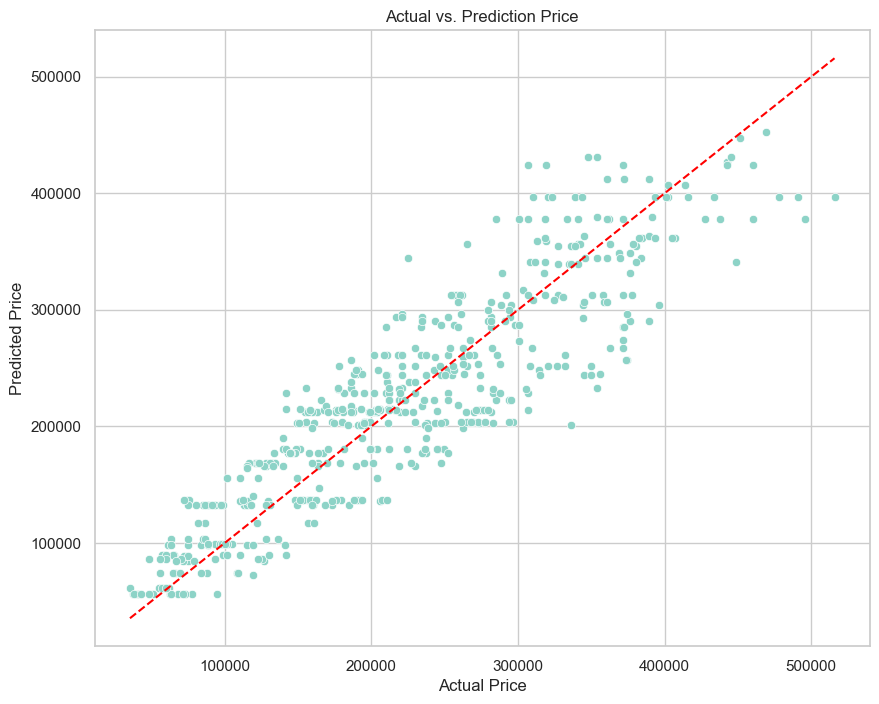

In [1495]:
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

min_val = min(min(y_test), min(y_pred_xgb_tuning))
max_val = max(max(y_test), max(y_pred_xgb_tuning))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')

dapat disimpulkan bahwa plot actual vs prediction tersebut menunjukkan bahwa model memprediksi nilai sebenarnya dengan cukup baik, hingga model 300000, namun setelah itu menjadi kurang akurat.

# Feature Importance

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [1497]:
xgb_best_param=Random_search_xgb.best_estimator_

In [1498]:
xgb_best_param['modeling'].feature_importances_

array([0.1014514 , 0.3022401 , 0.14968595, 0.06804798, 0.12080118,
       0.02359205, 0.00326508, 0.00333907, 0.08465555, 0.00320269,
       0.0064537 , 0.05328286, 0.0799824 ], dtype=float32)

In [1499]:
# Feature importance
feature_importances = xgb_best.best_estimator_.named_steps['modeling'].feature_importances_

# Nama Column
feature_names = transformed_X.columns

# Dataframe_Feature_importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


Feature  Importance
1                              scaler__YearBuilt    0.302240
2                              scaler__Size(sqf)    0.149686
4                     One Hot__HallwayType_mixed    0.120801
0                 scaler__N_Parkinglot(Basement)    0.101451
8   One Hot__SubwayStation_Kyungbuk_uni_hospital    0.084656
12            remainder__N_FacilitiesNearBy(ETC)    0.079982
3                pipe_encode_scale__TimeToSubway    0.068048
11       One Hot__SubwayStation_no_subway_nearby    0.053283
5              One Hot__SubwayStation_Banwoldang    0.023592
10                One Hot__SubwayStation_Sin-nam    0.006454
7                   One Hot__SubwayStation_Daegu    0.003339
6        One Hot__SubwayStation_Chil-sung-market    0.003265
9               One Hot__SubwayStation_Myung-duk    0.003203


1. Year_built merupakan fiture paling berpengaruh terhadap harga apartment, diikuting dengan Size, dan Tipe Hallway

2. 30% dari harga apartment dipengaruhi oleh tahun pembuatan

3. Dengan memahami feature importanct ini, agensi/owner jadi bisa tahu mana aparment yang harganya tinggi

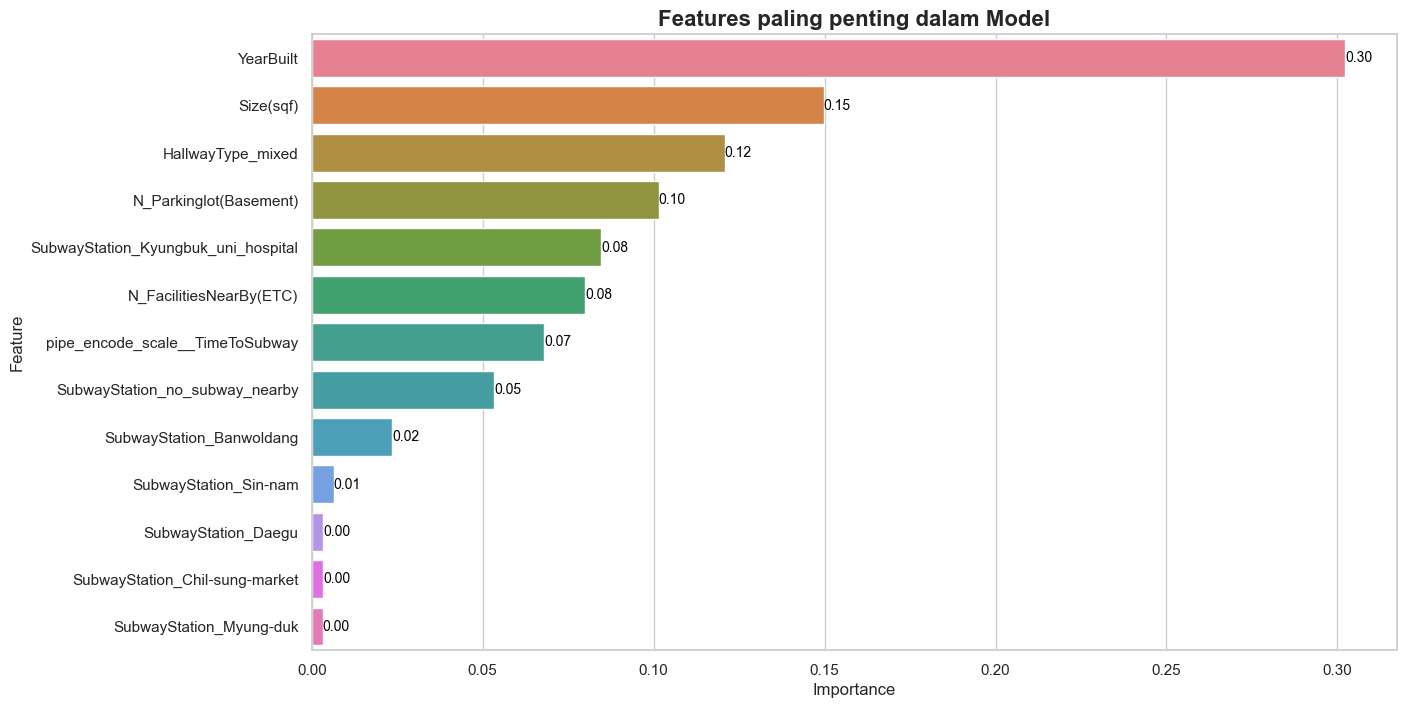

In [1500]:
# Remove prefixes from the 'Feature' column
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace('scaler__', '').str.replace('One Hot__', '').str.replace('remainder__', '')

plt.figure(figsize=(14, 8))
# Create a bar plot with custom colors
bar_plot = sns.barplot(data=feature_importance_df, x='Importance', y='Feature',hue='Feature',legend=False)

# Tambah anotasi
for index, value in enumerate(feature_importance_df['Importance']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.title('Features paling penting dalam Model', fontsize=16, fontweight='bold')

plt.show()




- Barplot menunjukan, YearBuilt merupakan paling berpengaruh dalam model dan diikuti oleh Size kemudian HallwayType
- Insight: Model menunjukan bahwa YearBuilt dan Size(sqf) merupakan faktor paling signifikan dalam menentukan harga sewa aprtment. Untuk feature yang lain juga berpengaruh namun tidak sesignificant YearBuilt
- **Rekomendasi:** Bisa melakukan Hyperparameter tuning dengan GridSearchCV agar mendapatkan performa model yang lebih baik dan mencoba mengunakan ensemble model seperti Voting Regressor & Stack Regressor


# 9. Conclusion and Recomendation

## Conclusion

Berdasarkan proses pemodelan yang sudah dilakukan didapatkan beberapa kesimpulan sebagai berikut :
1. Fitur paling berpengaruh adalah YearBuilt, SIze(sqf) dan HallwayType
2. XGBoost merupakan Model terbaik pada proses modeling untuk dataset daegu apartment yang bisa digunakan untuk memprediksi harga sewa apartment.
3. **XGBoost** memiliki skor RMSE, MAE terbaik bila dibandingkan dengan Random Forest Tree dan Decission Tree
4. Mape 19% bisa diimpretasikan good

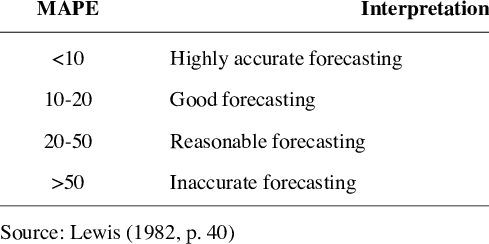

source:https://www.researchgate.net/profile/Albert-Sese/publication/257812432/figure/tbl1/AS:601657310203931@1520457689632/nterpretation-of-typical-MAPE-values.png

Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~19%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga apartment yang dilatih terhadap model (max 500k won), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 19% dari harga seharusnya.

## Rekomendasi

1. Untuk menentukan harga sewa aparment, fitur" dari dataset sangatlah penting, jika memungkinkan fitur ditambah lagi agar machine learning lebih akurat. Mungkin bisa menambahkan fitur, full furnished atau tidak, jumlah kamar, keamanan apartment, biaya listrik atau IPL bulanan rata" berapa dll. kalau bisa penambahan fitur yang lebih korelatif dengan target ('SalePrice').

2. Mengupdate dataset terbaru, karena UMR di DAEGU KOREA 2022: 4.130.000 Won, dan untuk harga sewa apartment rata-rata 846k won, namun pada model data kali ini rata" harga sewanya hanya 224k won. 

source: https://www.airbnb.com/s/Daegu--South-Korea/homes?adults=1&refinement_paths%5B%5D=%2Fhomes&date_picker_type=calendar&checkin=2024-03-01&checkout=2024-03-31

3. Memperhitungkan faktor eksternal yang dapat memengaruhi harga sewa apartemen di Daegu, Korea Selatan, misalnya ekomoni global, ekonomi micro, PDB dll.

# SAVE MODEL

In [1501]:
import pickle

In [1502]:
# best model

rf_tuning=Random_search_rf.best_estimator_

# fit
rf_tuning.fit(transformed_X, y)

# save with pickle
pickle.dump(rf_tuning, open('model_random_forest.sav', 'wb'))

In [1503]:
# load model

model_loaded = pickle.load(open('model_random_forest.sav', 'rb'))
model_loaded

Pipeline(steps=[('modeling',
                 RandomForestRegressor(max_depth=30, max_features=53,
                                       min_samples_leaf=2, min_samples_split=19,
                                       n_estimators=300, random_state=0))])

In [1504]:
import xgboost as xgb
from xgboost import plot_importance